# Assignment 2

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fuzzywuzzy import fuzz

In [53]:
hospital1 = pd.read_excel('./hospital1.xlsx', index_col=None)
hospital1.head()

,patient ID,patient ID.1,nationality,age,gender K=female E=male,date_of_first_symptoms,BASVURUTARIHI,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,AIDS_HIV,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,PCR_result
0,11850006,11850006,T.C.,47,K,2022-01-01,2022-01-01,38.2,96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
1,4373630,4373630,T.C.,23,K,2022-01-01,2022-01-01,37.0,96.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
2,12172023,12172023,T.C.,26,K,2022-01-01,2022-01-01,38.0,95.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
3,72856168,72856168,T.C.,60,K,2022-01-01,2022-01-01,36.5,95.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive
4,72200559,72200559,T.C.,72,K,2021-12-22,2021-12-22,36.9,96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,positive


In [54]:
hospital2 = pd.read_excel('./hospital2.xlsx', index_col=None)
hospital2.head()

,patient_id,admission_id,country_of_residence,age,sex,date_of_first_symptoms,admission_date,fever_temperature,oxygen_saturation,history_of_fever,...,chronic_hematologic_disease,AIDS_HIV,diabetes_mellitus_type_1,diabetes_mellitus_type_2,rheumatologic_disorder,dementia,tuberculosis,smoking,other_risks,PCR_result
0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
1,88567155.0,45.0,T.C.,52.0,E=male K=female,2021-03-01 00:00:00,2021-03-01 00:00:00,37.3,-1.0,0.0,...,0,0,0,0,0,0,0,0,0,positive
2,36069621.0,181.0,T.C.,47.0,K,2021-03-01 08:38:00,2021-03-01 08:38:00,38.0,95.0,1.0,...,0,0,0,0,0,0,0,0,0,positive
3,57644199.0,36.0,T.C.,36.0,K,2021-03-01 08:39:00,2021-03-01 08:39:00,37.5,88.0,0.0,...,0,0,0,0,0,0,0,0,0,positive
4,81365404.0,32.0,T.C.,30.0,E,2021-03-01 09:25:00,2021-03-01 09:25:00,37.8,87.0,1.0,...,0,0,0,0,0,0,0,0,0,positive


### 1. Data Exploration

1.1. Hospital 1. Check If 'patient ID' and 'patient ID.1' are the same  

In [55]:
different_rows = hospital1[hospital1['patient ID'] != hospital1['patient ID.1']]

if not different_rows.empty:
    print("The following rows have different values between 'patient ID' and 'patient ID.1':")
    print(different_rows)
    print("Total different rows: " + str(len(different_rows)))
else:
    print("There are no rows with different values between 'patient ID' and 'patient ID.1'.")

The following rows have different values between 'patient ID' and 'patient ID.1':
       patient ID  patient ID.1 nationality  age gender K=female E=male  \
1187       712249       6798097        T.C.   28                      K   
2957       215634      98284721        T.C.   33                      E   
4219      2015016      96844453        T.C.   51                      E   
6470       712249       6798097        T.C.   30                      K   
7774      2015016      96844453        T.C.   52                      E   
11900      712249       6798097        T.C.   28                      K   
13616      712249       6798097        T.C.   28                      K   

      date_of_first_symptoms BASVURUTARIHI  fever_temperature  \
1187              2022-02-03    2022-02-03               38.6   
2957              2021-05-06    2021-05-06                NaN   
4219              2021-09-08    2021-09-08               39.2   
6470              2022-01-13    2022-01-13               

1.1.1 Check date of first symptoms and BASVURUTARIHI (means consultation date in Turkish)

In [56]:
different_date_rows = hospital1[hospital1['date_of_first_symptoms'] != hospital1['BASVURUTARIHI']]

if not different_date_rows.empty:
    print("The following rows have different values between 'date_of_first_symptoms' and 'BASVURUTARIHI':")
    print(different_date_rows)
    print("Total different date rows: " + str(len(different_date_rows)))
else:
    print("There are no rows with different values between 'date_of_first_symptoms' and 'BASVURUTARIHI'.")

There are no rows with different values between 'date_of_first_symptoms' and 'BASVURUTARIHI'.


1.2 Hospital 2. Check if patients are admitted multiple times (same patient id different admission id) 

In [57]:
# Find patient IDs with multiple admission IDs
multiple_admissions = hospital2.groupby('patient_id')['admission_id'].nunique()

# Filter to find patient IDs with more than one unique admission ID
multiple_admissions = multiple_admissions[multiple_admissions > 1]

if not multiple_admissions.empty:
    print("The following patient IDs have multiple admission IDs:")
    print(multiple_admissions)
    print('Total multiple admissions for one patient id, rows: ' + str(len(multiple_admissions))) 
else:
    print("No patient has multiple admission IDs.")

The following patient IDs have multiple admission IDs:
patient_id
93178.0       2
178643.0      2
336282.0      2
348559.0      2
358053.0      4
             ..
99816840.0    3
99864755.0    2
99874733.0    2
99896182.0    2
99922605.0    5
Name: admission_id, Length: 2052, dtype: int64
Total multiple admissions for one patient id, rows: 2052


1.3 Together 
    - Similar Rows
    - Same rows in both datasets with different results  

In [58]:
# Define a similarity threshold (RETHINK)
similarity_threshold = 100

# Find similar columns
similar_columns = []
for col1 in hospital1.columns:
    for col2 in hospital2.columns:
        similarity_score = fuzz.ratio(col1, col2)
        if similarity_score >= similarity_threshold:
            similar_columns.append((col1, col2, similarity_score))

# Display results
if similar_columns:
    print("Columns with similar meanings:")
    for col1, col2, score in similar_columns:
        print(f"'{col1}' in hospital1 and '{col2}' in hospital2 with similarity score: {score}")
    print('Total columns with similar meanings: ' + str(len(similar_columns)))
else:
    print("No columns with similar meanings found.")

Columns with similar meanings:
'age' in hospital1 and 'age' in hospital2 with similarity score: 100
'date_of_first_symptoms' in hospital1 and 'date_of_first_symptoms' in hospital2 with similarity score: 100
'fever_temperature' in hospital1 and 'fever_temperature' in hospital2 with similarity score: 100
'oxygen_saturation' in hospital1 and 'oxygen_saturation' in hospital2 with similarity score: 100
'history_of_fever' in hospital1 and 'history_of_fever' in hospital2 with similarity score: 100
'cough' in hospital1 and 'cough' in hospital2 with similarity score: 100
'sore_throat' in hospital1 and 'sore_throat' in hospital2 with similarity score: 100
'runny_nose' in hospital1 and 'runny_nose' in hospital2 with similarity score: 100
'wheezing' in hospital1 and 'wheezing' in hospital2 with similarity score: 100
'shortness_of_breath' in hospital1 and 'shortness_of_breath' in hospital2 with similarity score: 100
'lower_chest_wall_indrawing' in hospital1 and 'lower_chest_wall_indrawing' in hospi

In [59]:
# Define a similarity threshold (RETHINK) find patients ids
similarity_threshold = 64 

# Find similar columns
similar_columns = []
for col1 in hospital1.columns:
    for col2 in hospital2.columns:
        similarity_score = fuzz.ratio(col1, col2)
        if similarity_score >= similarity_threshold and similarity_score != 100:
            similar_columns.append((col1, col2, similarity_score))

# Display results
if similar_columns:
    print("Columns with similar meanings:")
    for col1, col2, score in similar_columns:
        print(f"'{col1}' in hospital1 and '{col2}' in hospital2 with similarity score: {score}")
    print('Total columns with similar meanings: ' + str(len(similar_columns)))
else:
    print("No columns with similar meanings found.")


Columns with similar meanings:
'patient ID' in hospital1 and 'patient_id' in hospital2 with similarity score: 70
'patient ID.1' in hospital1 and 'patient_id' in hospital2 with similarity score: 64
'date_of_first_symptoms' in hospital1 and 'other_symptoms' in hospital2 with similarity score: 67
'loss_of_smell' in hospital1 and 'loss_of_taste' in hospital2 with similarity score: 77
'loss_of_taste' in hospital1 and 'loss_of_smell' in hospital2 with similarity score: 77
'joint_pain' in hospital1 and 'abdominal_pain' in hospital2 with similarity score: 67
'abdominal_pain' in hospital1 and 'joint_pain' in hospital2 with similarity score: 67
'other_symptoms' in hospital1 and 'other_risks' in hospital2 with similarity score: 64
'chronic_cardiac_disease' in hospital1 and 'chronic_pulmonary_disease' in hospital2 with similarity score: 75
'chronic_cardiac_disease' in hospital1 and 'chronic_kidney_disease' in hospital2 with similarity score: 76
'chronic_cardiac_disease' in hospital1 and 'chronic_h

1.4 Check all columns  
    - Missing values  
    - Null values  
    - Inconsistencies  
    - (Check slides for more) 

In [60]:
# Count missing values in each column
missing_values = hospital1.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
patient ID                            0
patient ID.1                          0
nationality                           0
age                                   0
gender K=female E=male                0
date_of_first_symptoms                0
BASVURUTARIHI                         0
fever_temperature                   468
oxygen_saturation                     4
history_of_fever                      0
cough                                 0
sore_throat                           0
runny_nose                            0
wheezing                              0
shortness_of_breath                   0
lower_chest_wall_indrawing            0
chest_pain                            0
conjunctivitis                        0
lymphadenopathy                       0
headache                              0
loss_of_smell                         0
loss_of_taste                         0
fatigue_malaise                       0
anorexia                              0
altered_consc

In [61]:
# Check if each column has any missing values
missing_columns = hospital1.isnull().any()
print("Columns with missing values:")
print(missing_columns[missing_columns])

Columns with missing values:
fever_temperature                True
oxygen_saturation                True
chronic_kidney_disease           True
obesity                          True
liver_disease                    True
asplenia                         True
chronic_neurological_disorder    True
chronic_hematologic_disease      True
AIDS_HIV                         True
diabetes_mellitus_type_1         True
diabetes_mellitus_type_2         True
rheumatologic_disorder           True
dementia                         True
PCR_result                       True
dtype: bool


In [62]:
# Find rows with any missing values
rows_with_missing = hospital1[hospital1.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing)

Rows with missing values:
       patient ID  patient ID.1 nationality  age gender K=female E=male  \
148      53361041      53361041        T.C.   74                      E   
208      54985772      54985772        T.C.   43                      E   
210      44027514      44027514        T.C.   42                      K   
211      91563230      91563230        T.C.   34                      E   
225      35727043      35727043        T.C.   45                      E   
...           ...           ...         ...  ...                    ...   
14530    26745720      26745720        T.C.   67                      E   
14565    44013023      44013023        T.C.   31                      E   
14566    76211905      76211905        T.C.   21                      E   
14568    79637839      79637839        T.C.   63                      E   
14569    21986155      21986155        T.C.   24                      E   

      date_of_first_symptoms BASVURUTARIHI  fever_temperature  \
148     

In [63]:
hospital1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   patient ID                       14712 non-null  int64         
 1   patient ID.1                     14712 non-null  int64         
 2   nationality                      14712 non-null  object        
 3   age                              14712 non-null  int64         
 4   gender K=female E=male           14712 non-null  object        
 5   date_of_first_symptoms           14712 non-null  datetime64[ns]
 6   BASVURUTARIHI                    14712 non-null  datetime64[ns]
 7   fever_temperature                14244 non-null  float64       
 8   oxygen_saturation                14708 non-null  float64       
 9   history_of_fever                 14712 non-null  int64         
 10  cough                            14712 non-null  int64    

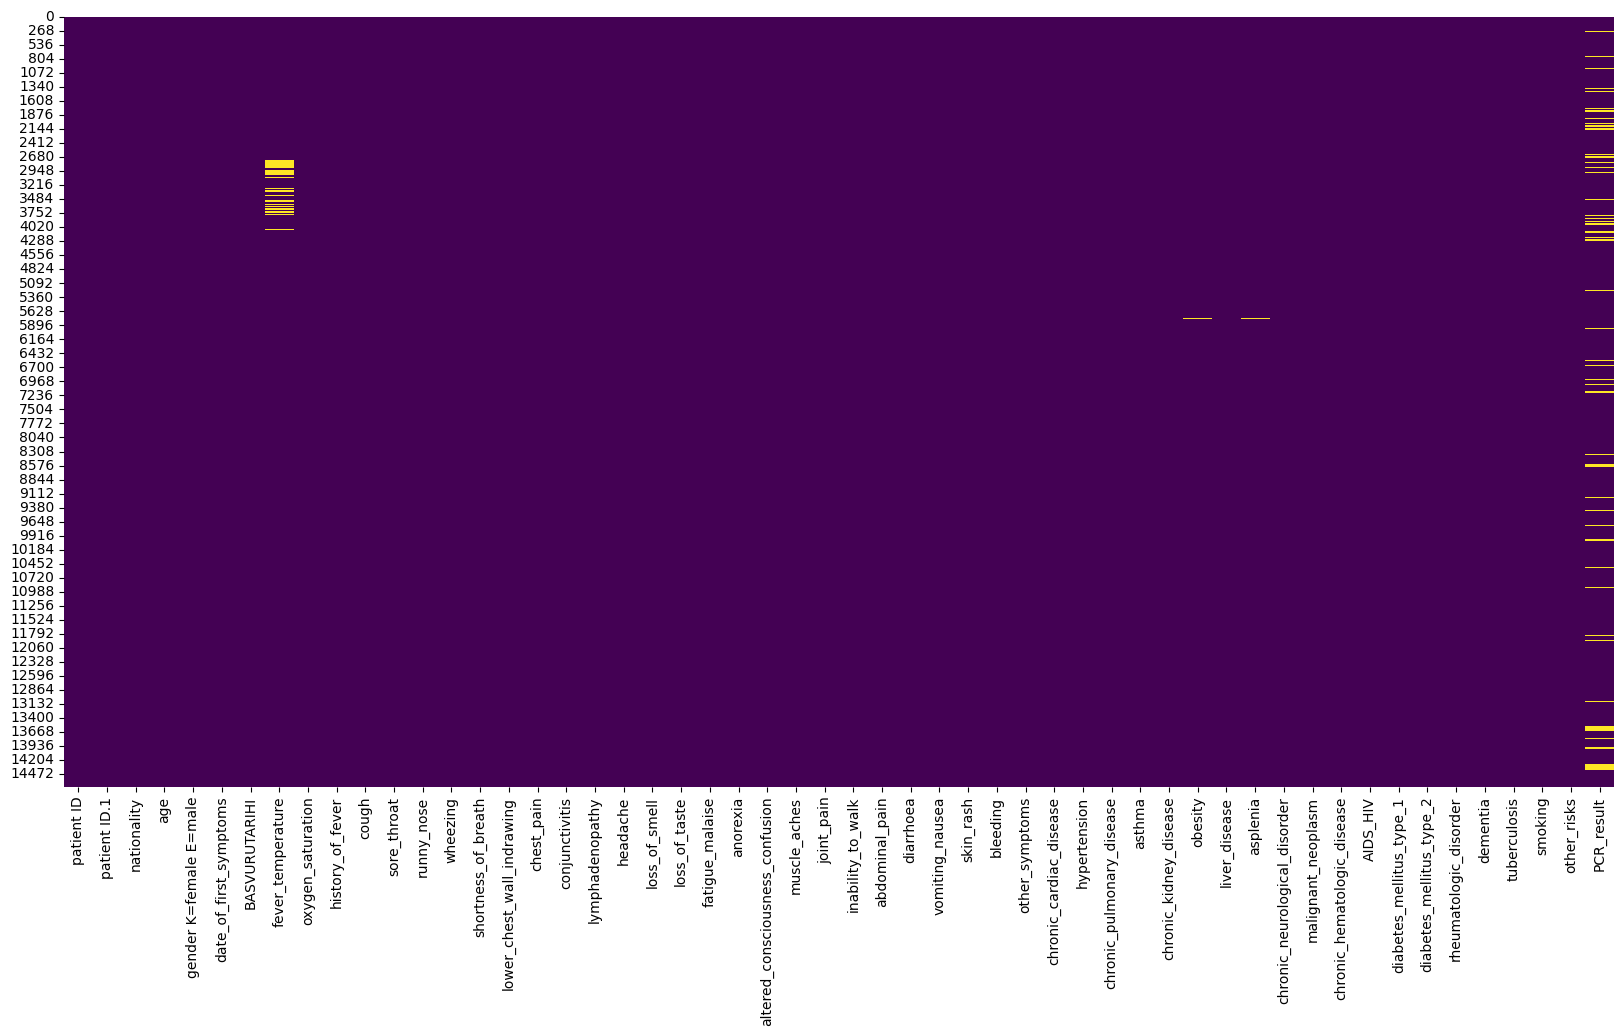

In [64]:
plt.figure(figsize=(20, 10))

# Visualize missing values
sns.heatmap(hospital1.isnull(), cbar=False, cmap="viridis")
plt.show()

In [65]:
# Count missing values in each column
missing_values = hospital2.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
patient_id                            3
admission_id                          3
country_of_residence                  3
age                                   3
sex                                   3
date_of_first_symptoms                3
admission_date                        3
fever_temperature                  1222
oxygen_saturation                     7
history_of_fever                      8
cough                                 1
sore_throat                           1
runny_nose                            3
wheezing                              3
shortness_of_breath                   3
lower_chest_wall_indrawing            3
chest_pain                            3
conjunctivitis                        3
lymphadenopathy                       3
headache                              1
loss_of_smell                         1
loss_of_taste                         1
fatigue_malaise                       1
anorexia                              1
altered_consc

In [66]:
# Check if each column has any missing values
missing_columns = hospital2.isnull().any()
print("Columns with missing values:")
print(missing_columns[missing_columns])

Columns with missing values:
patient_id                         True
admission_id                       True
country_of_residence               True
age                                True
sex                                True
date_of_first_symptoms             True
admission_date                     True
fever_temperature                  True
oxygen_saturation                  True
history_of_fever                   True
cough                              True
sore_throat                        True
runny_nose                         True
wheezing                           True
shortness_of_breath                True
lower_chest_wall_indrawing         True
chest_pain                         True
conjunctivitis                     True
lymphadenopathy                    True
headache                           True
loss_of_smell                      True
loss_of_taste                      True
fatigue_malaise                    True
anorexia                           True
altered_con

In [67]:
# Find rows with any missing values
rows_with_missing = hospital2[hospital2.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing)

Rows with missing values:
       patient_id  admission_id country_of_residence   age  sex  \
0             NaN           NaN                  NaN   NaN  NaN   
235    68080132.0          19.0                 T.C.  49.0    K   
322    72299377.0         150.0                 T.C.  47.0    K   
1015   79996593.0           3.0                 T.C.  54.0    E   
1219   98011297.0           2.0                 T.C.  64.0    K   
...           ...           ...                  ...   ...  ...   
12732  69906416.0          33.0                 T.C.  38.0    E   
12733  51323961.0           5.0                 T.C.  45.0    E   
12734  55408811.0         182.0                 T.C.  41.0    K   
12735         NaN           NaN                  NaN   NaN  NaN   
12736         NaN           NaN                  NaN   NaN  NaN   

      date_of_first_symptoms      admission_date  fever_temperature  \
0                        NaT                 NaT                NaN   
235      2021-03-13 11:35:0

In [68]:
hospital2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   patient_id                       12734 non-null  float64       
 1   admission_id                     12734 non-null  float64       
 2   country_of_residence             12734 non-null  object        
 3   age                              12734 non-null  float64       
 4   sex                              12734 non-null  object        
 5   date_of_first_symptoms           12734 non-null  datetime64[ns]
 6   admission_date                   12734 non-null  datetime64[ns]
 7   fever_temperature                11515 non-null  float64       
 8   oxygen_saturation                12730 non-null  float64       
 9   history_of_fever                 12729 non-null  float64       
 10  cough                            12736 non-null  float64  

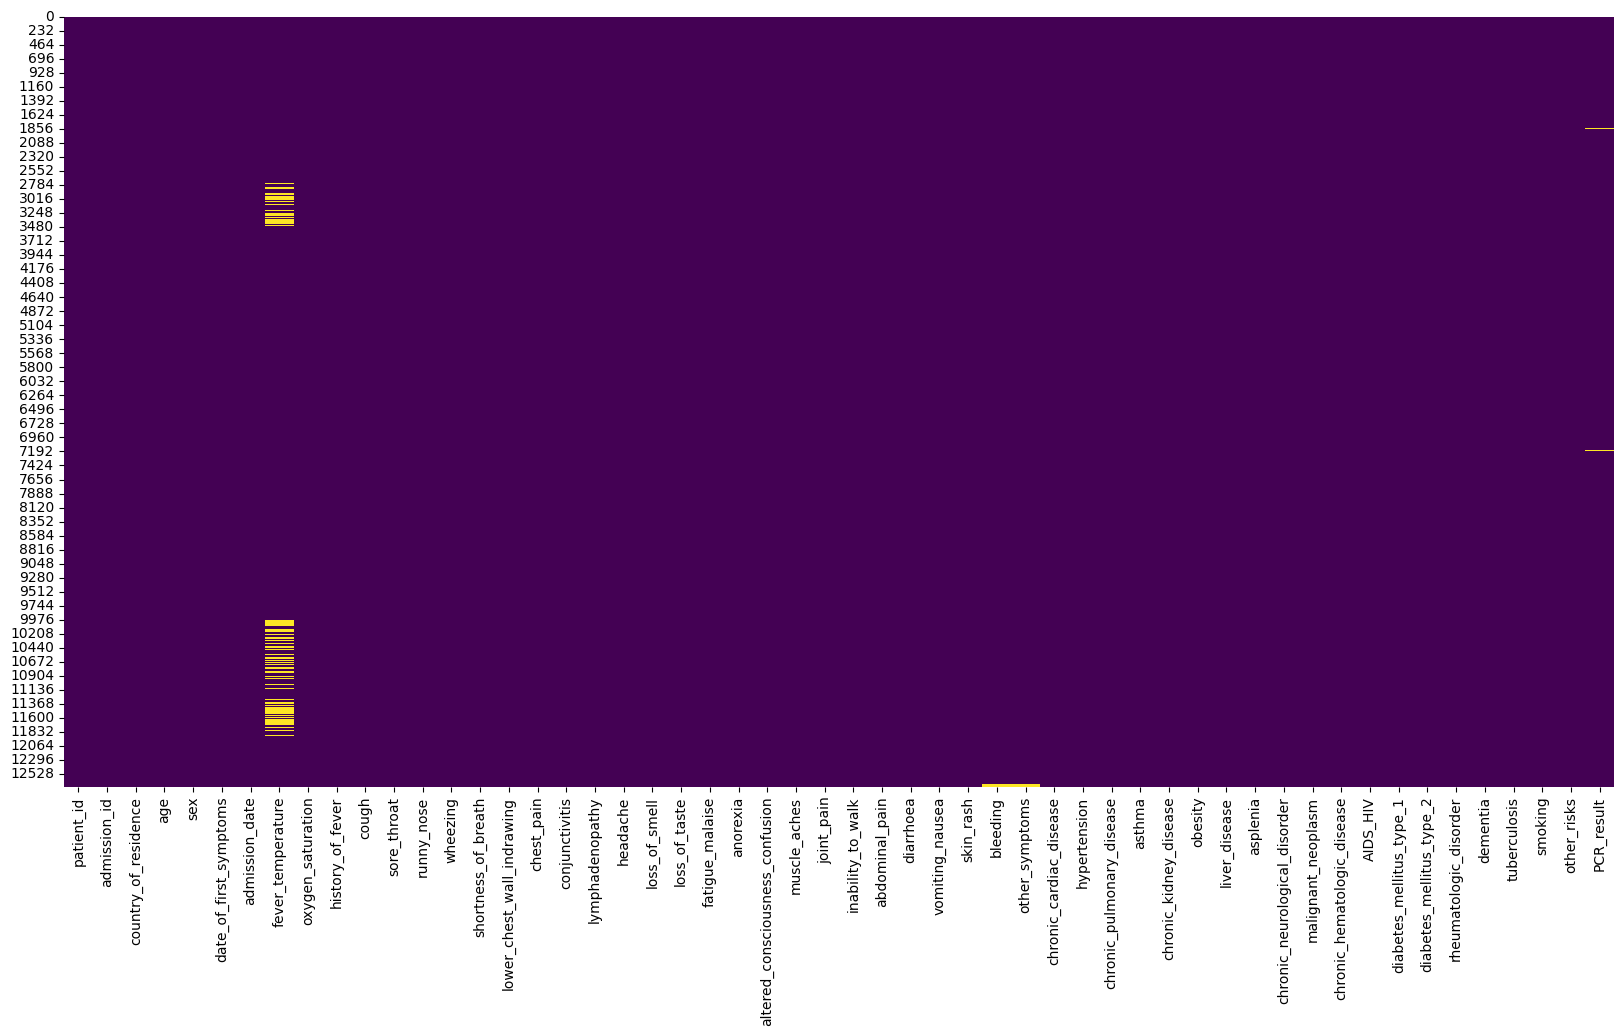

In [69]:
plt.figure(figsize=(20, 10))

# Visualize missing values
sns.heatmap(hospital2.isnull(), cbar=False, cmap="viridis")
plt.show()


1.5 Create visualization  

PCR_result
positive    12434
NaN          1176
negative     1102
Name: count, dtype: int64


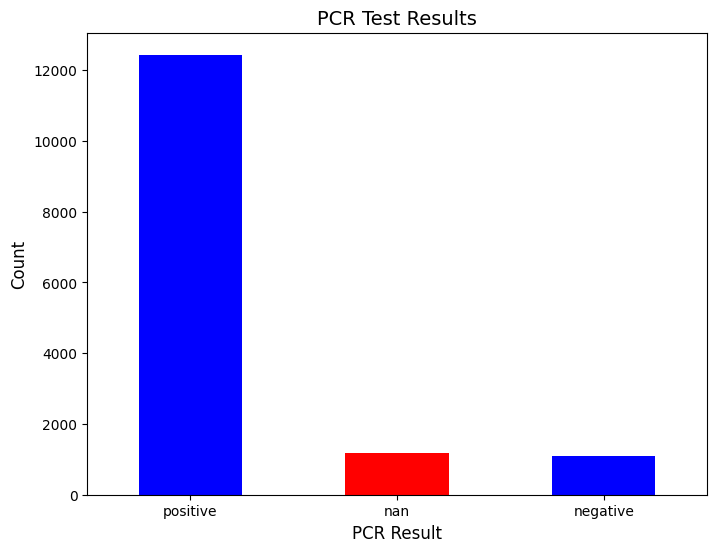

In [70]:
# Count the number of positive and negative PCR results
pcr_counts = hospital1['PCR_result'].value_counts(dropna=False)
print(pcr_counts)

# Create a bar plot to visualize PCR results
plt.figure(figsize=(8, 6))
pcr_counts.plot(kind='bar', color=['blue', 'red'])

# Add titles and labels
plt.title('PCR Test Results', fontsize=14)
plt.xlabel('PCR Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Rotate the x-axis labels for readability

# Show the plot
plt.show()

PCR_result
positive    9778
negative    2925
NaN           34
Name: count, dtype: int64


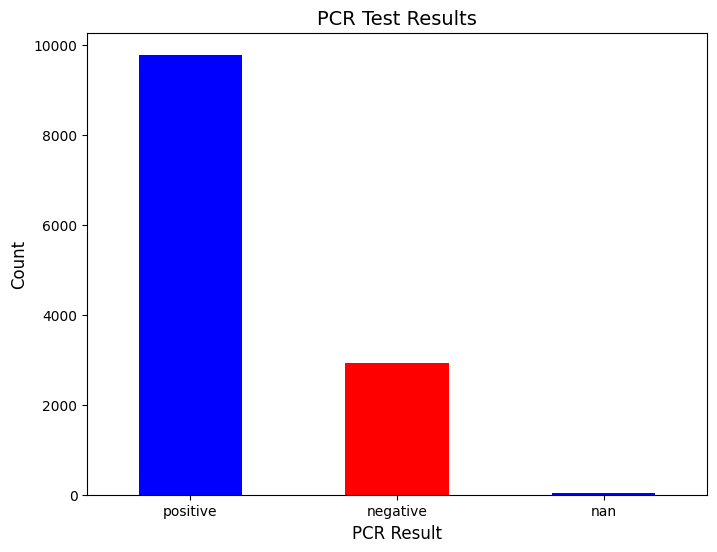

In [71]:
# Count the number of positive and negative PCR results
pcr_counts = hospital2['PCR_result'].value_counts(dropna=False)
print(pcr_counts)

# Create a bar plot to visualize PCR results
plt.figure(figsize=(8, 6))
pcr_counts.plot(kind='bar', color=['blue', 'red'])

# Add titles and labels
plt.title('PCR Test Results', fontsize=14)
plt.xlabel('PCR Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Rotate the x-axis labels for readability

# Show the plot
plt.show()

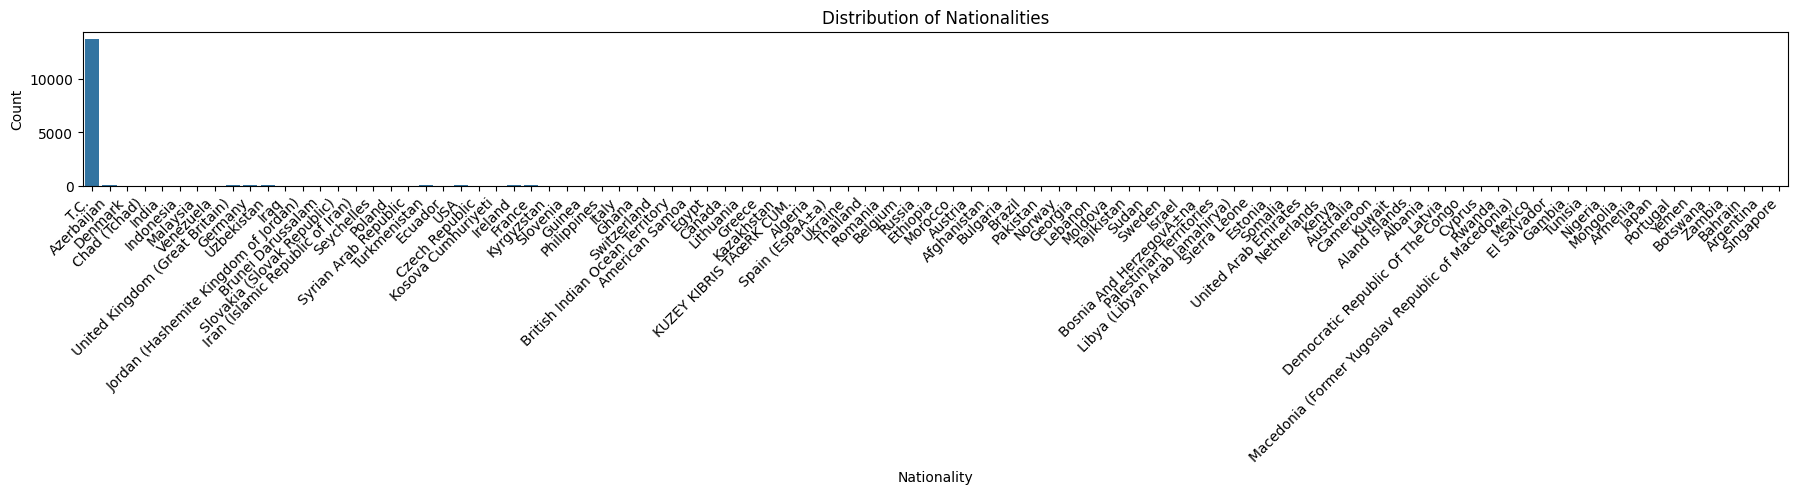

In [72]:
# Example: Count plot for the nationality column
plt.figure(figsize=(22, 2))
sns.countplot(x='nationality', data=hospital1)
plt.title('Distribution of Nationalities')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

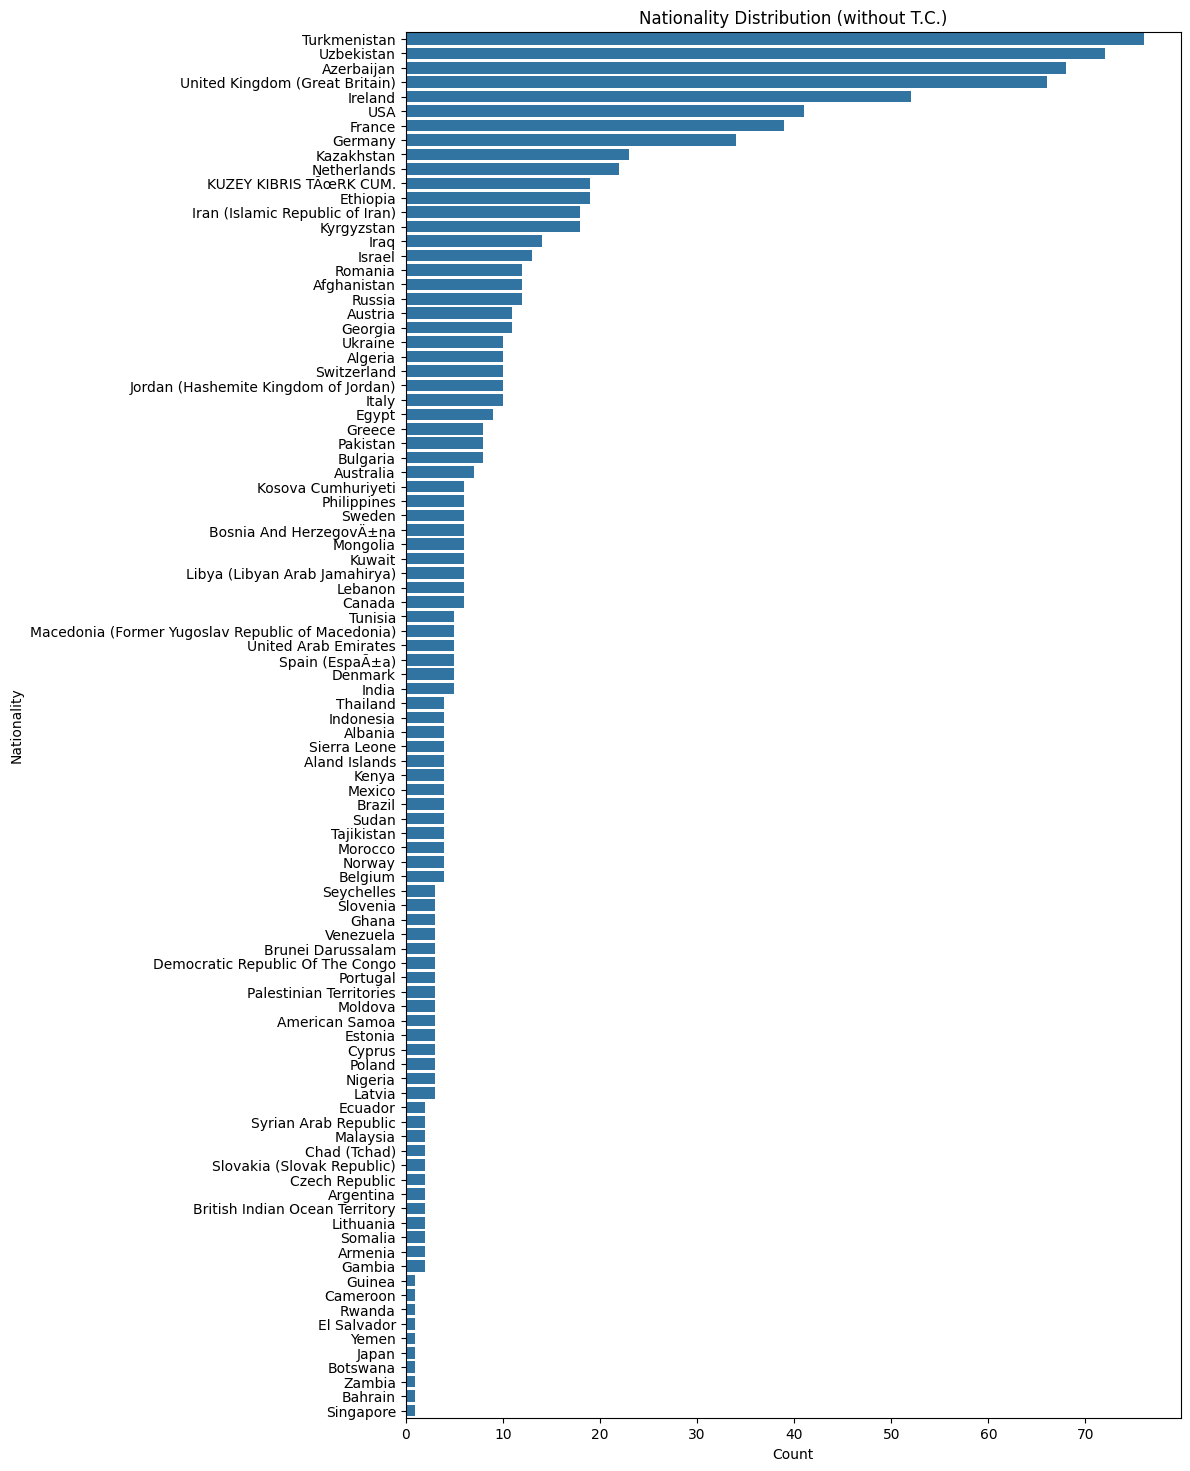

In [73]:
# Example: Horizontal bar plot for nationality distribution
hospital1_filtered = hospital1[hospital1['nationality'] != 'T.C.']
nationality_counts = hospital1_filtered['nationality'].value_counts()

plt.figure(figsize=(10, 18))
sns.barplot(x=nationality_counts.values, y=nationality_counts.index)
plt.title('Nationality Distribution (without T.C.)')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

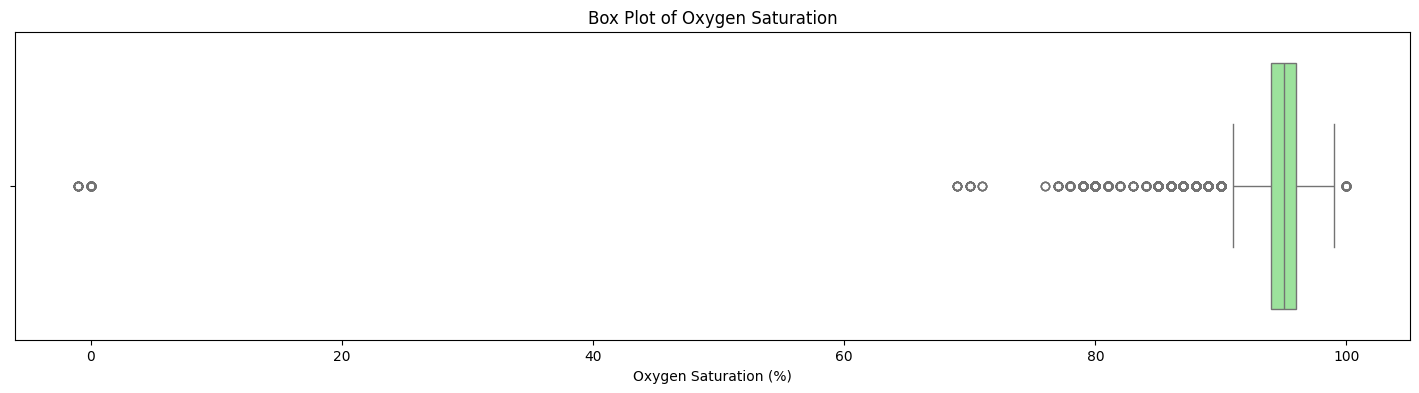

In [74]:
# Box plot to visualize oxygen saturation
plt.figure(figsize=(18, 4)) 
sns.boxplot(x=hospital1['oxygen_saturation'], color='lightgreen')
plt.title('Box Plot of Oxygen Saturation')
plt.xlabel('Oxygen Saturation (%)')
plt.show()

Ranges for Oxygen Saturation:
- 95% to 100%: Normal
- 90% to 94%: Mildly low (monitor, consult if persistent)
- Below 90%: Hypoxemia (medical attention recommended)
- Below 85%: Severe hypoxemia (urgent medical intervention required)

numerical columns: 49
categorical columns: 3


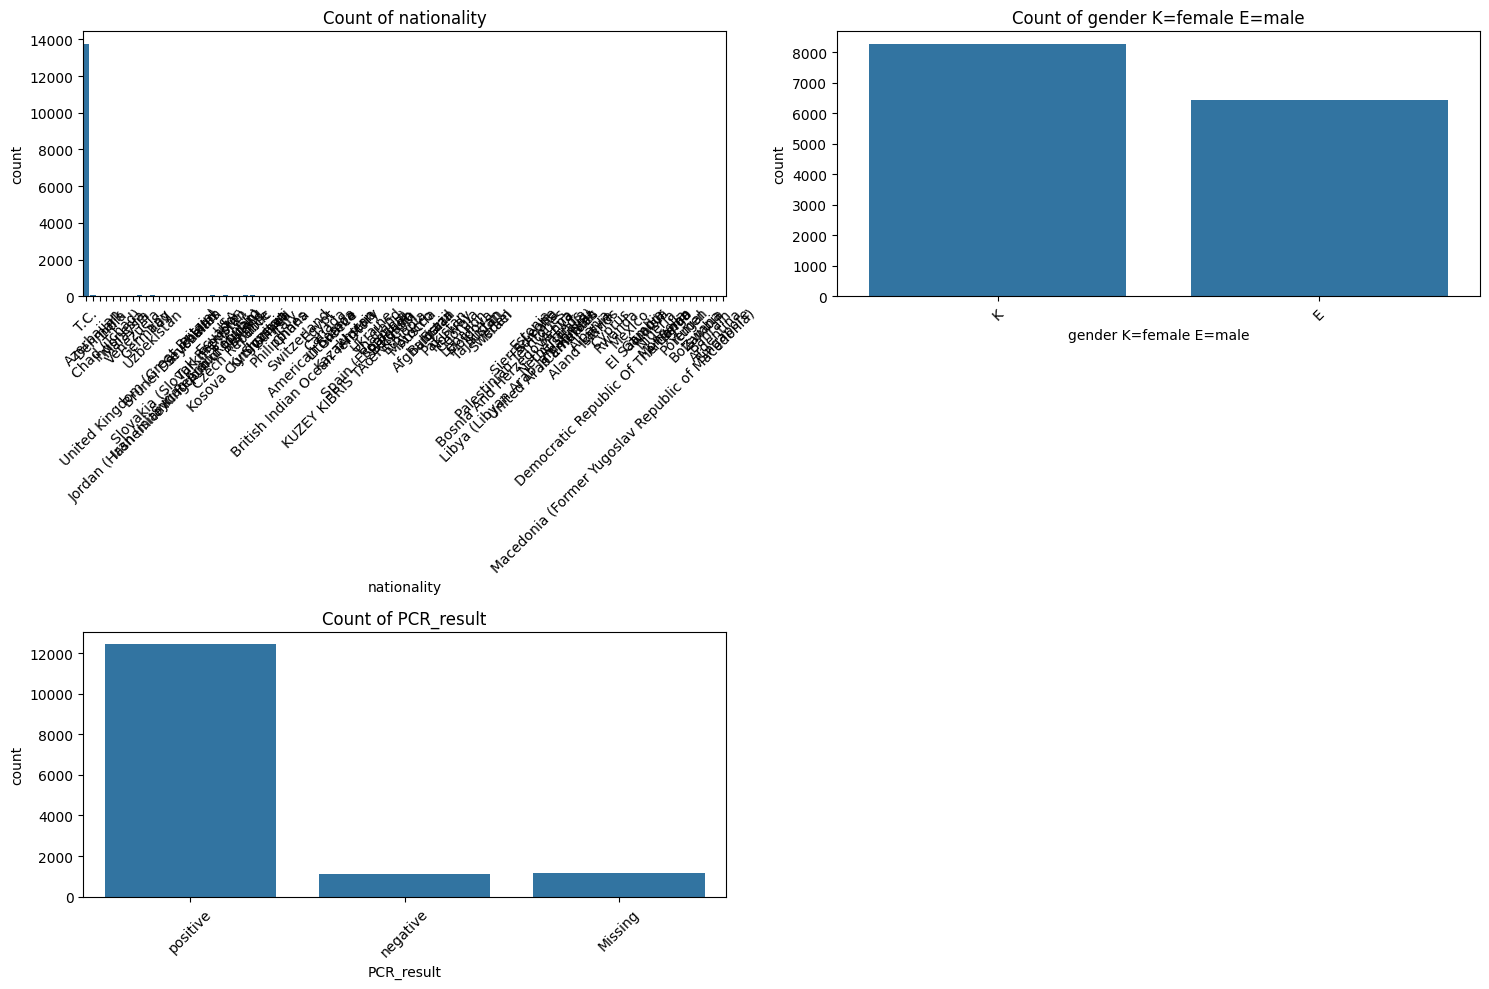

In [75]:
num_columns = hospital1.select_dtypes(include='number').columns  # Get numerical columns
cat_columns = hospital1.select_dtypes(include='object').columns   # Get categorical columns

print("numerical columns: " + str(len(num_columns)))
print("categorical columns: " + str(len(cat_columns)))

# Create plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_columns):
    plt.subplot(2, len(cat_columns) // 2 + 1, i + 1)
    sns.countplot(x=hospital1[col].fillna("Missing"))  # Count plot for categorical variables
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

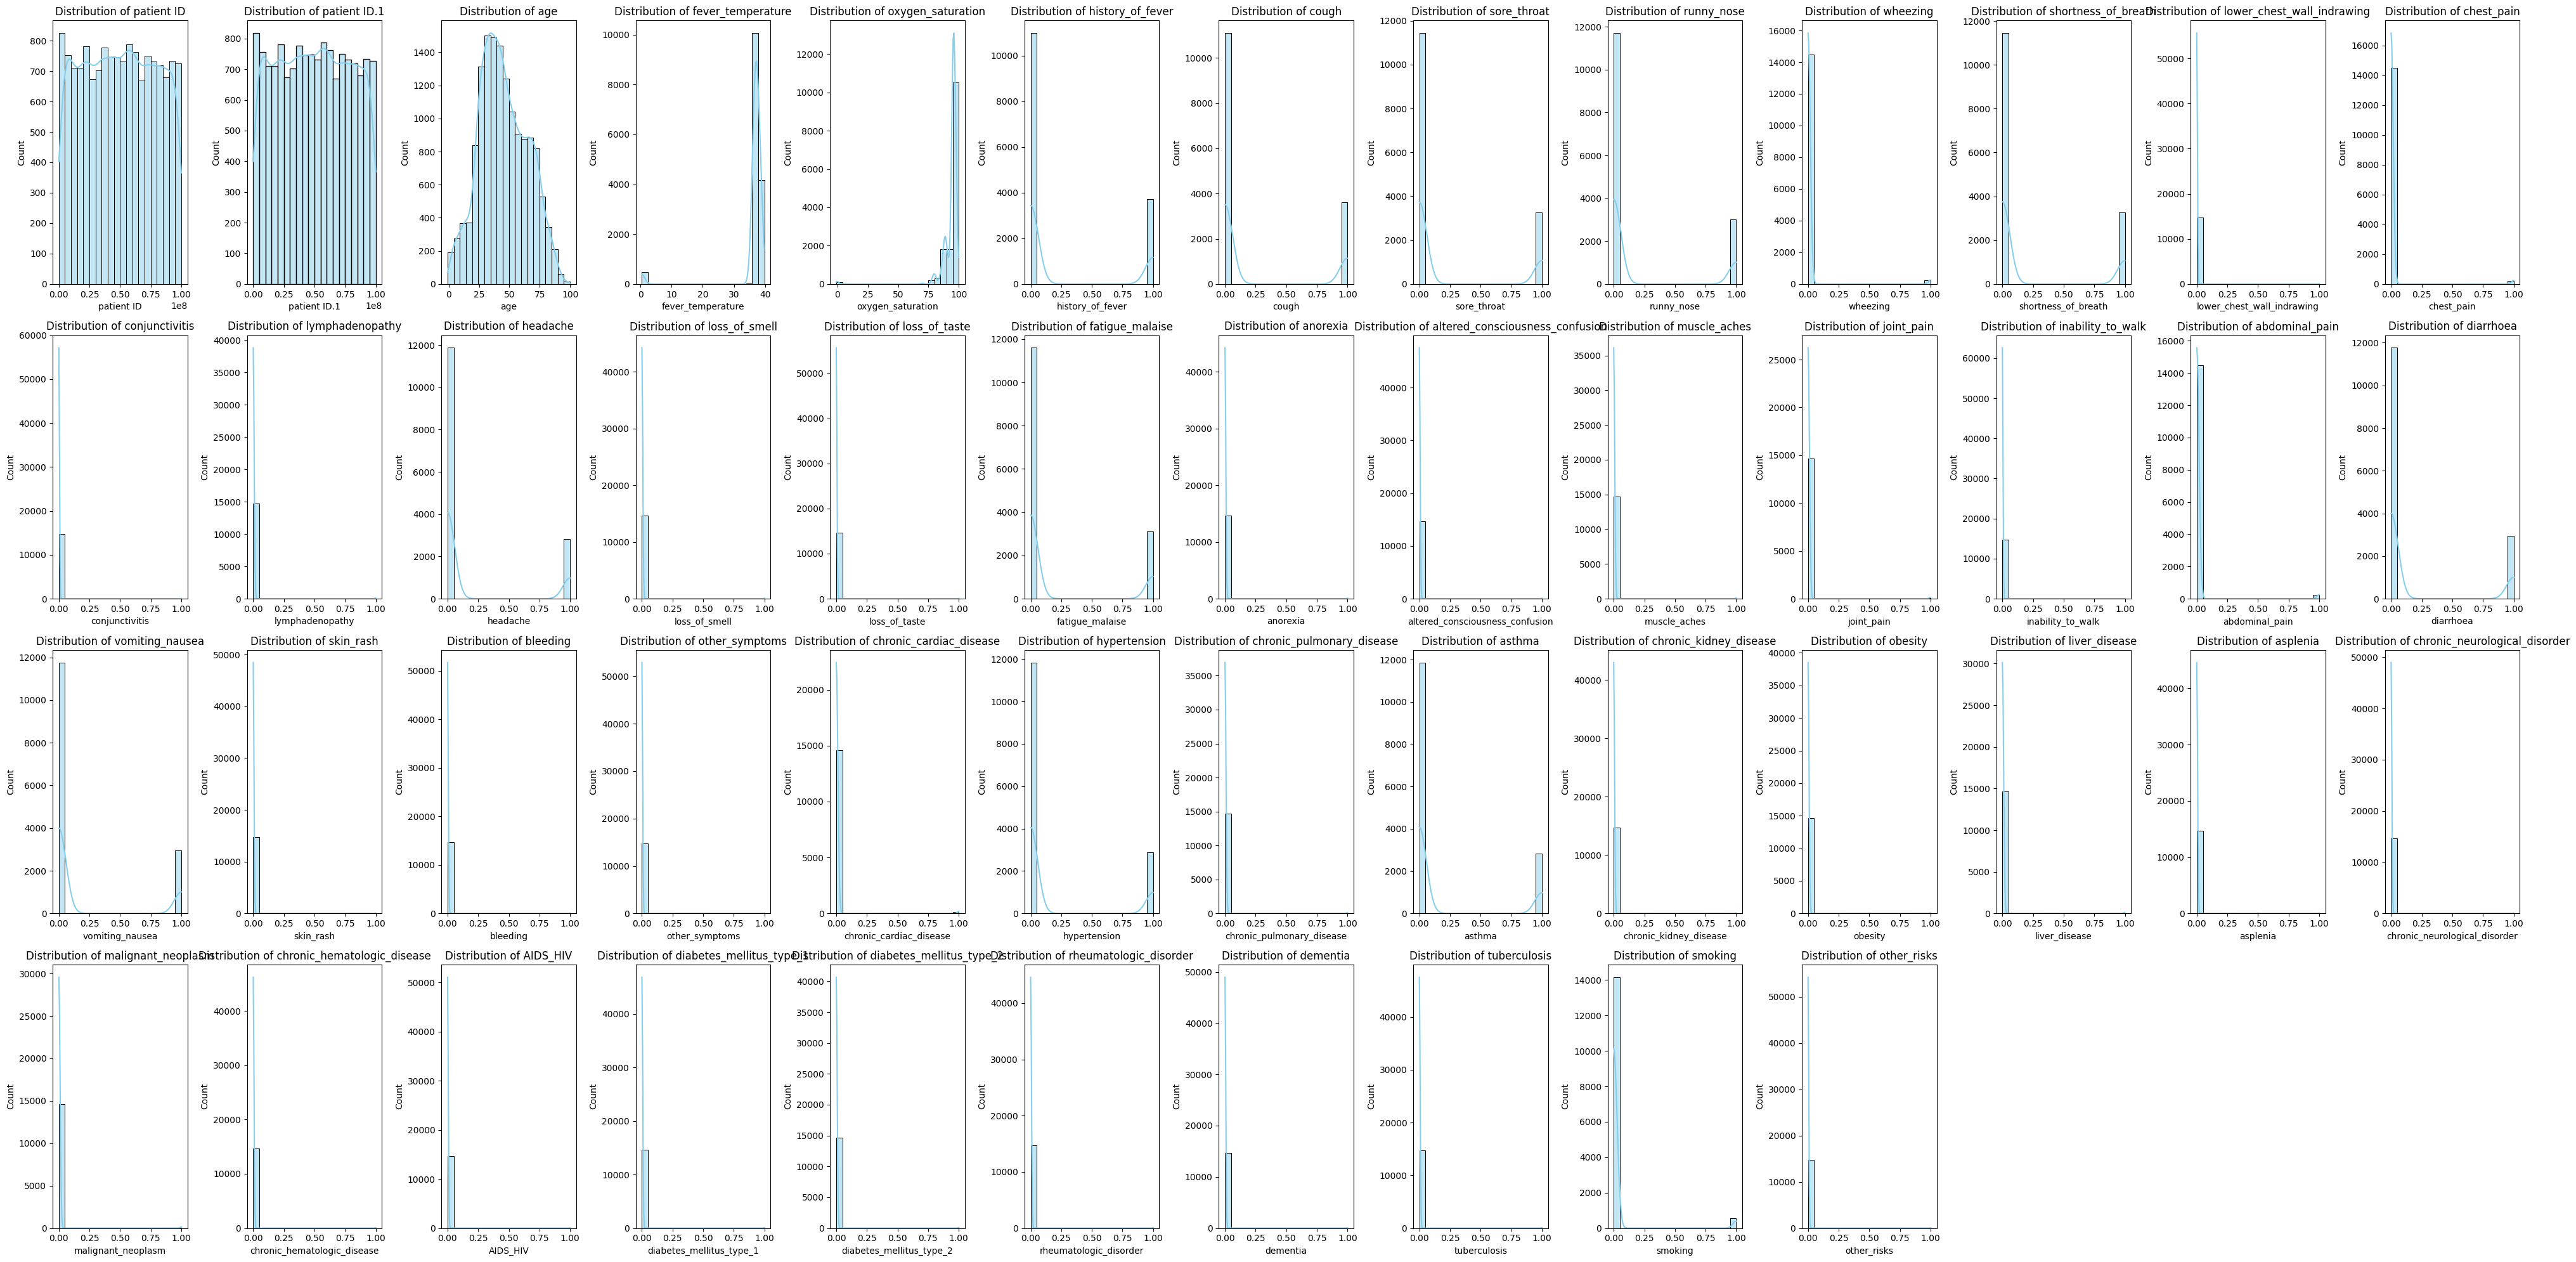

In [76]:
# Set up the plotting space for multiple plots
num_columns = hospital1.select_dtypes(include='number').columns  # Get numerical columns

# Create plots for numerical columns
plt.figure(figsize=(40, 20))
for i, col in enumerate(num_columns):
    plt.subplot(4, len(num_columns) // 4 + 1, i + 1)  # Set a grid for subplots
    sns.histplot(hospital1[col].fillna(0.5), kde=True, bins=20, color='skyblue')  # You can change this to other plots (e.g., boxplot)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  # To avoid overlapping subplots

plt.show()

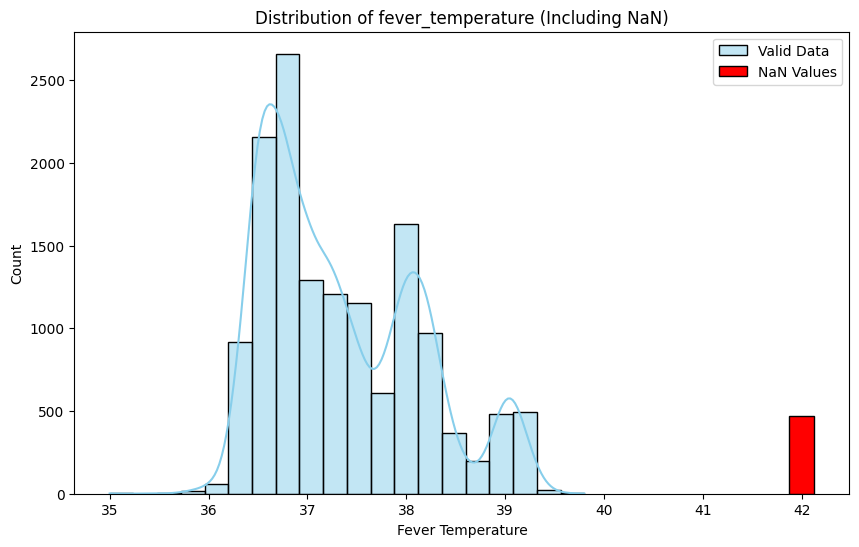

In [77]:
#sns.histplot(hospital1['fever_temperature'], kde=True, bins=20, color='skyblue')  # .fillna(999)
#plt.title(f'Distribution of fever_temperature')

#plt.show()

valid_data = hospital1['fever_temperature'].dropna()
nan_count = hospital1['fever_temperature'].isna().sum()

plt.figure(figsize=(10, 6))

# Plot valid data
sns.histplot(valid_data, kde=True, bins=20, color='skyblue', label='Valid Data')

# Add a bar for NaN values at a specific placeholder (e.g., 99)
plt.bar([42], [nan_count], color='red', width=0.25,edgecolor='Black', label='NaN Values')

# Title and legend
plt.title('Distribution of fever_temperature (Including NaN)')
plt.xlabel('Fever Temperature')
plt.ylabel('Count')
plt.legend()

plt.show()

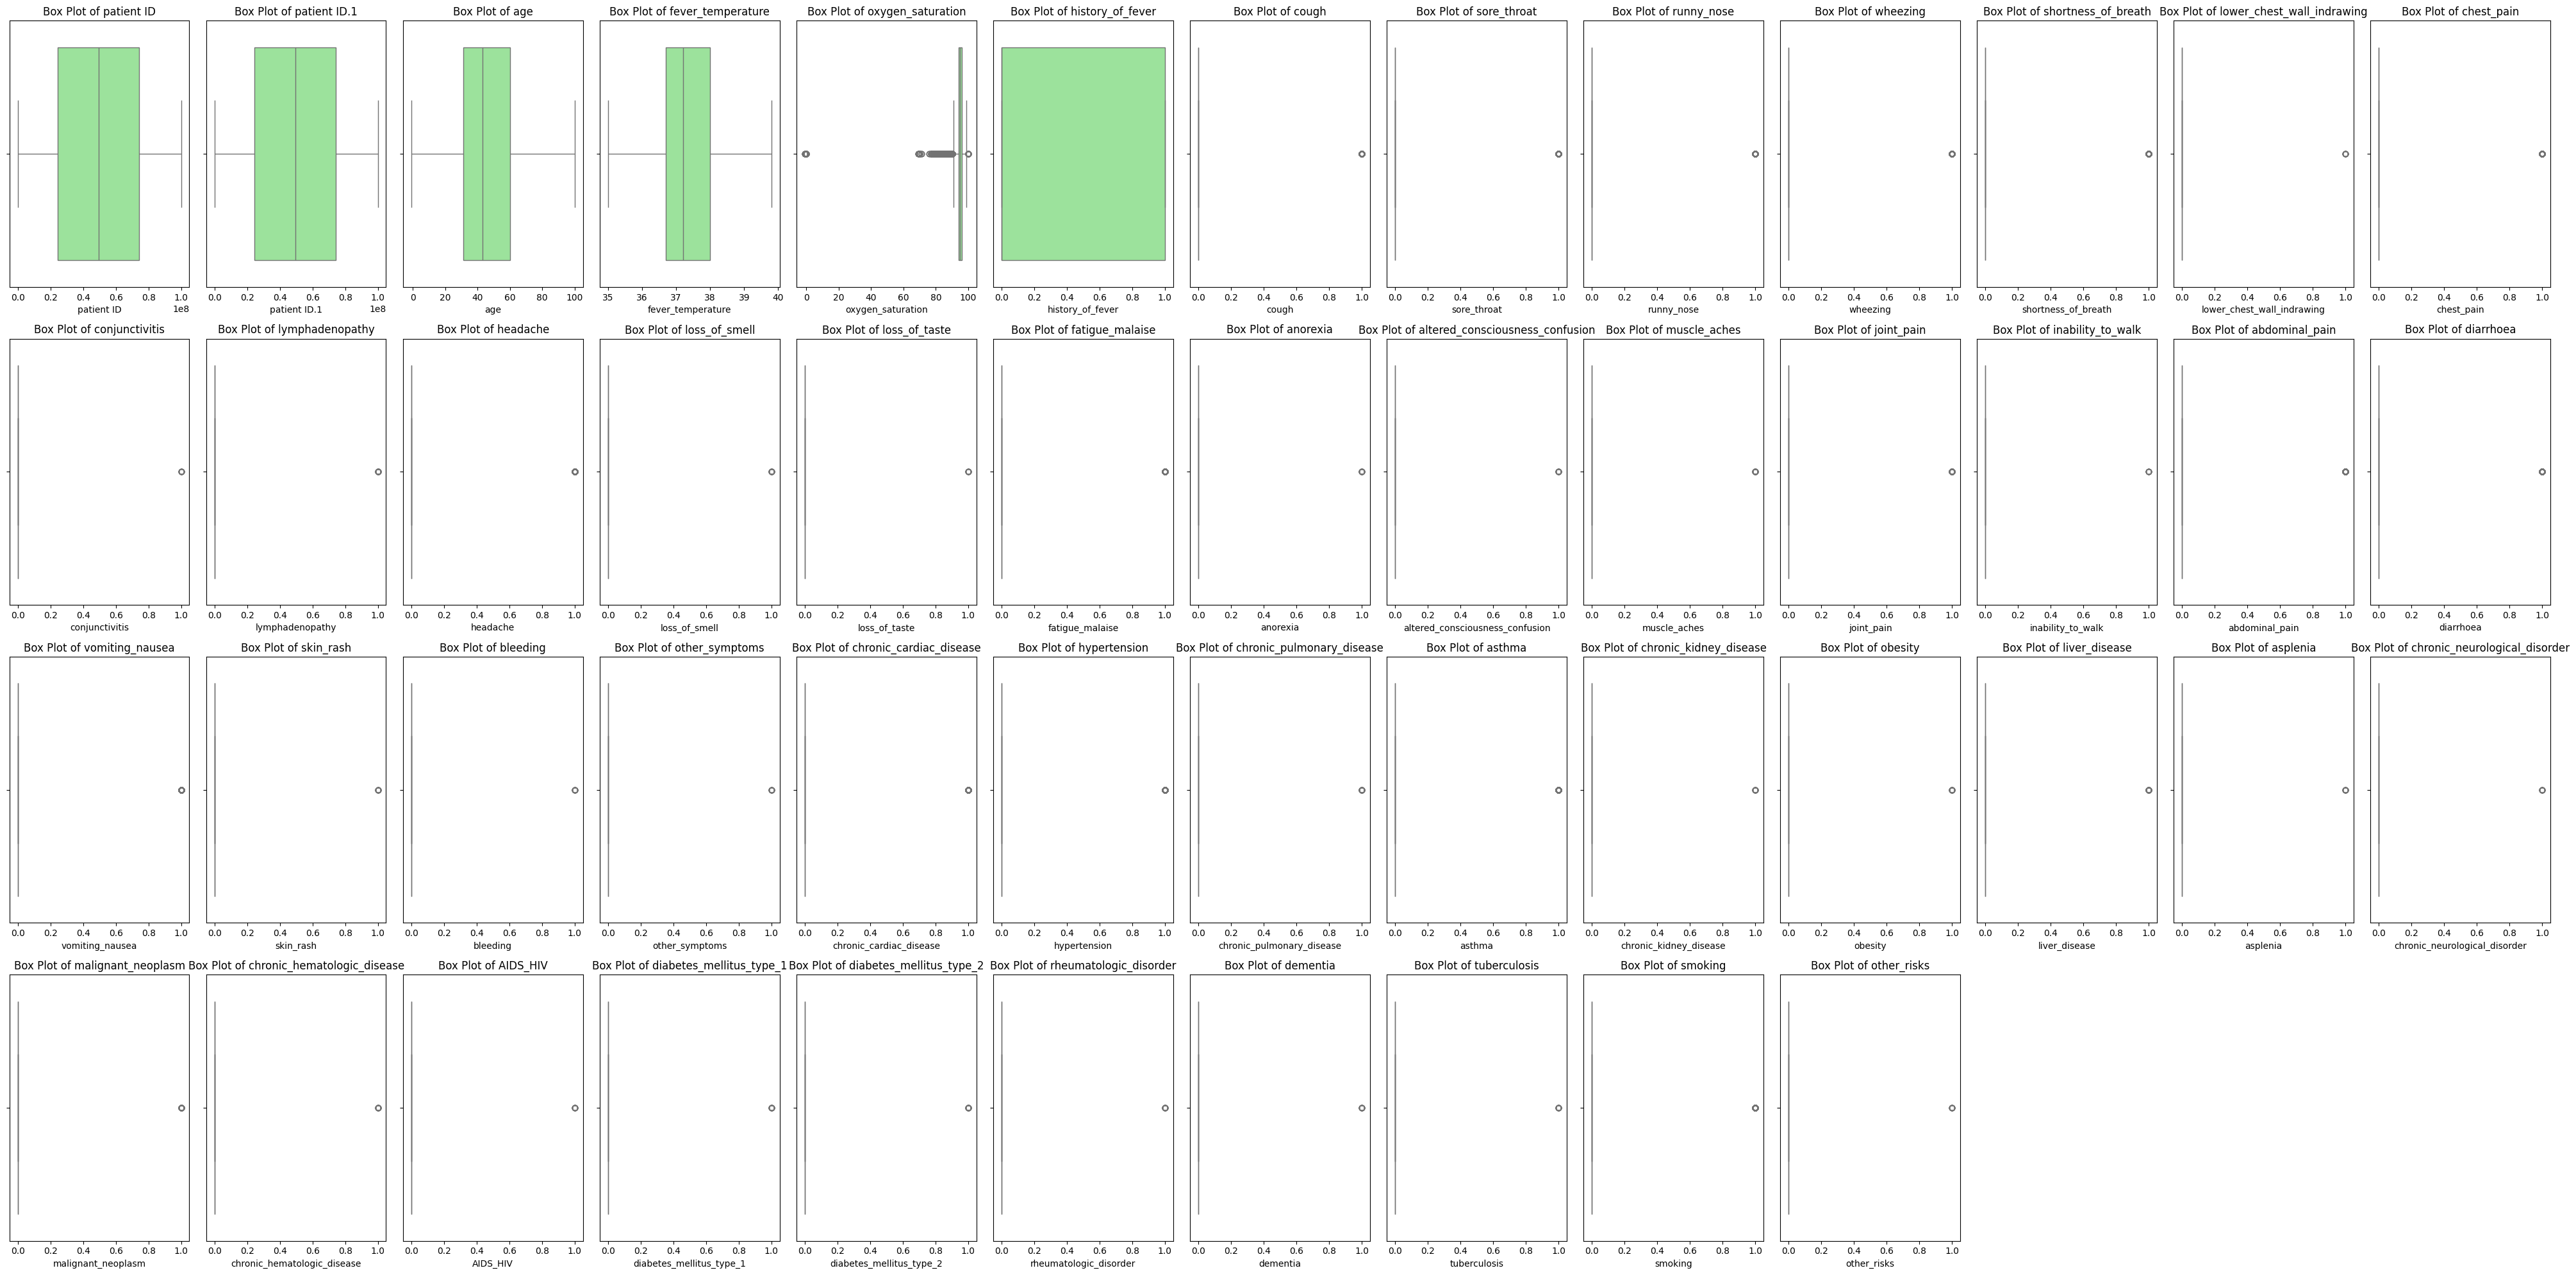

In [78]:
# Set up the plotting space for multiple plots
num_columns = hospital1.select_dtypes(include='number').columns  # Get numerical columns

# Create plots for numerical columns
plt.figure(figsize=(40, 20))
for i, col in enumerate(num_columns):
    plt.subplot(4, len(num_columns) // 4 + 1, i + 1)  # Set a grid for subplots
    sns.boxplot(x=hospital1[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()  # To avoid overlapping subplots

plt.show()

numerical columns: 49
categorical columns: 3


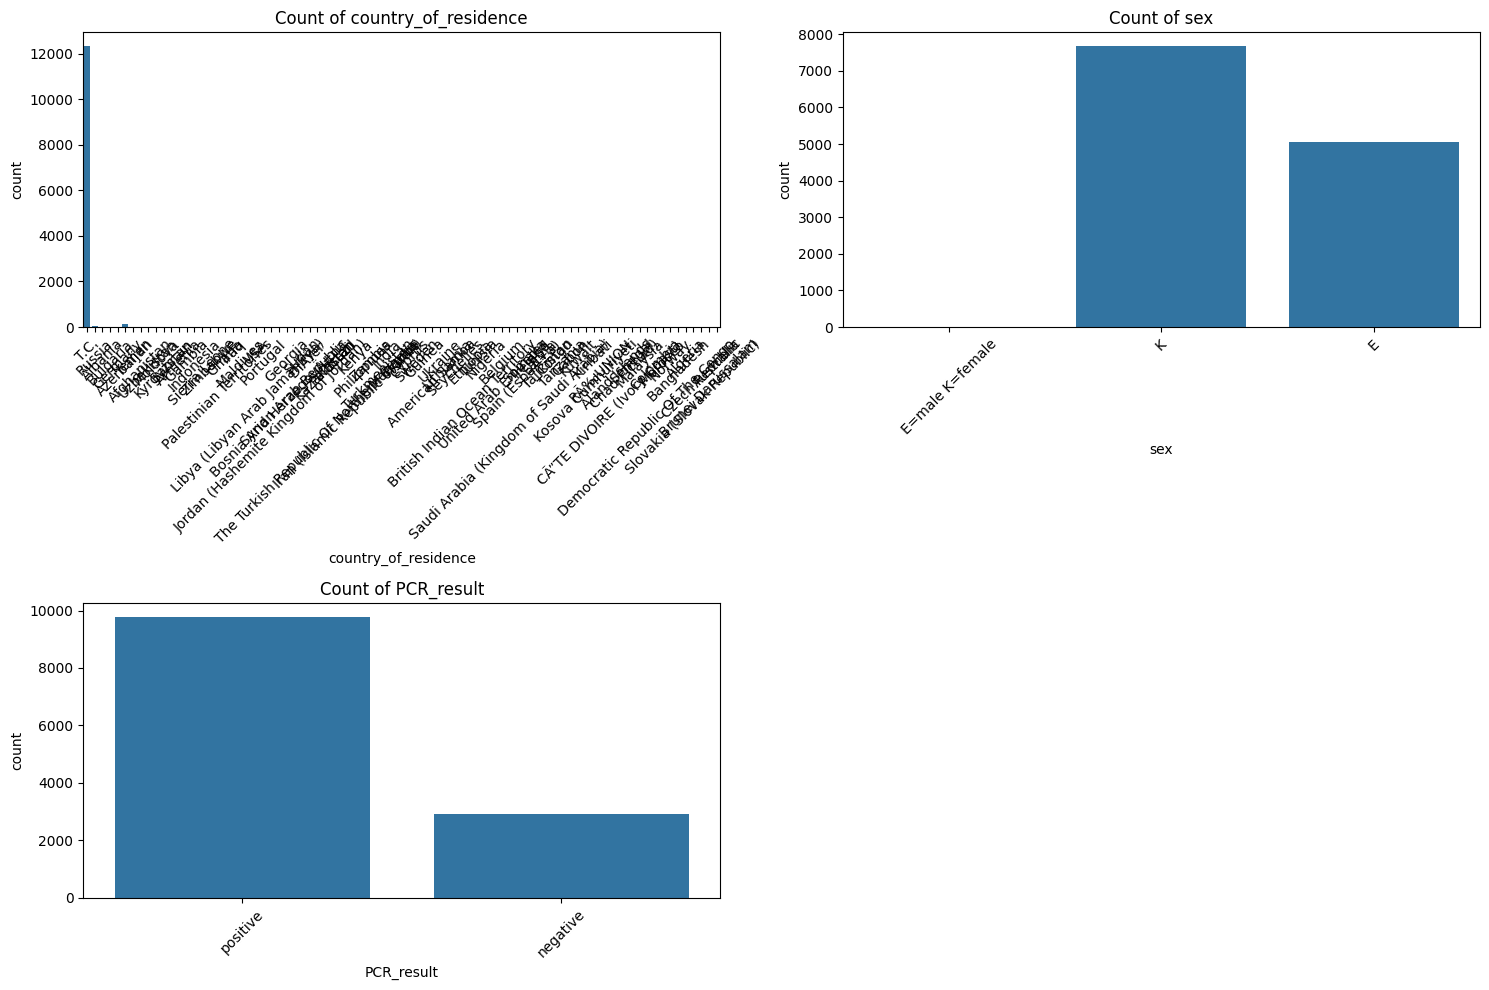

In [79]:
num_columns_2 = hospital2.select_dtypes(include='number').columns  # Get numerical columns
cat_columns_2 = hospital2.select_dtypes(include='object').columns   # Get categorical columns

print("numerical columns: " + str(len(num_columns_2)))
print("categorical columns: " + str(len(cat_columns_2)))

# Create plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_columns_2):
    plt.subplot(2, len(cat_columns_2) // 2 + 1, i + 1)
    sns.countplot(x=hospital2[col])  # Count plot for categorical variables
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

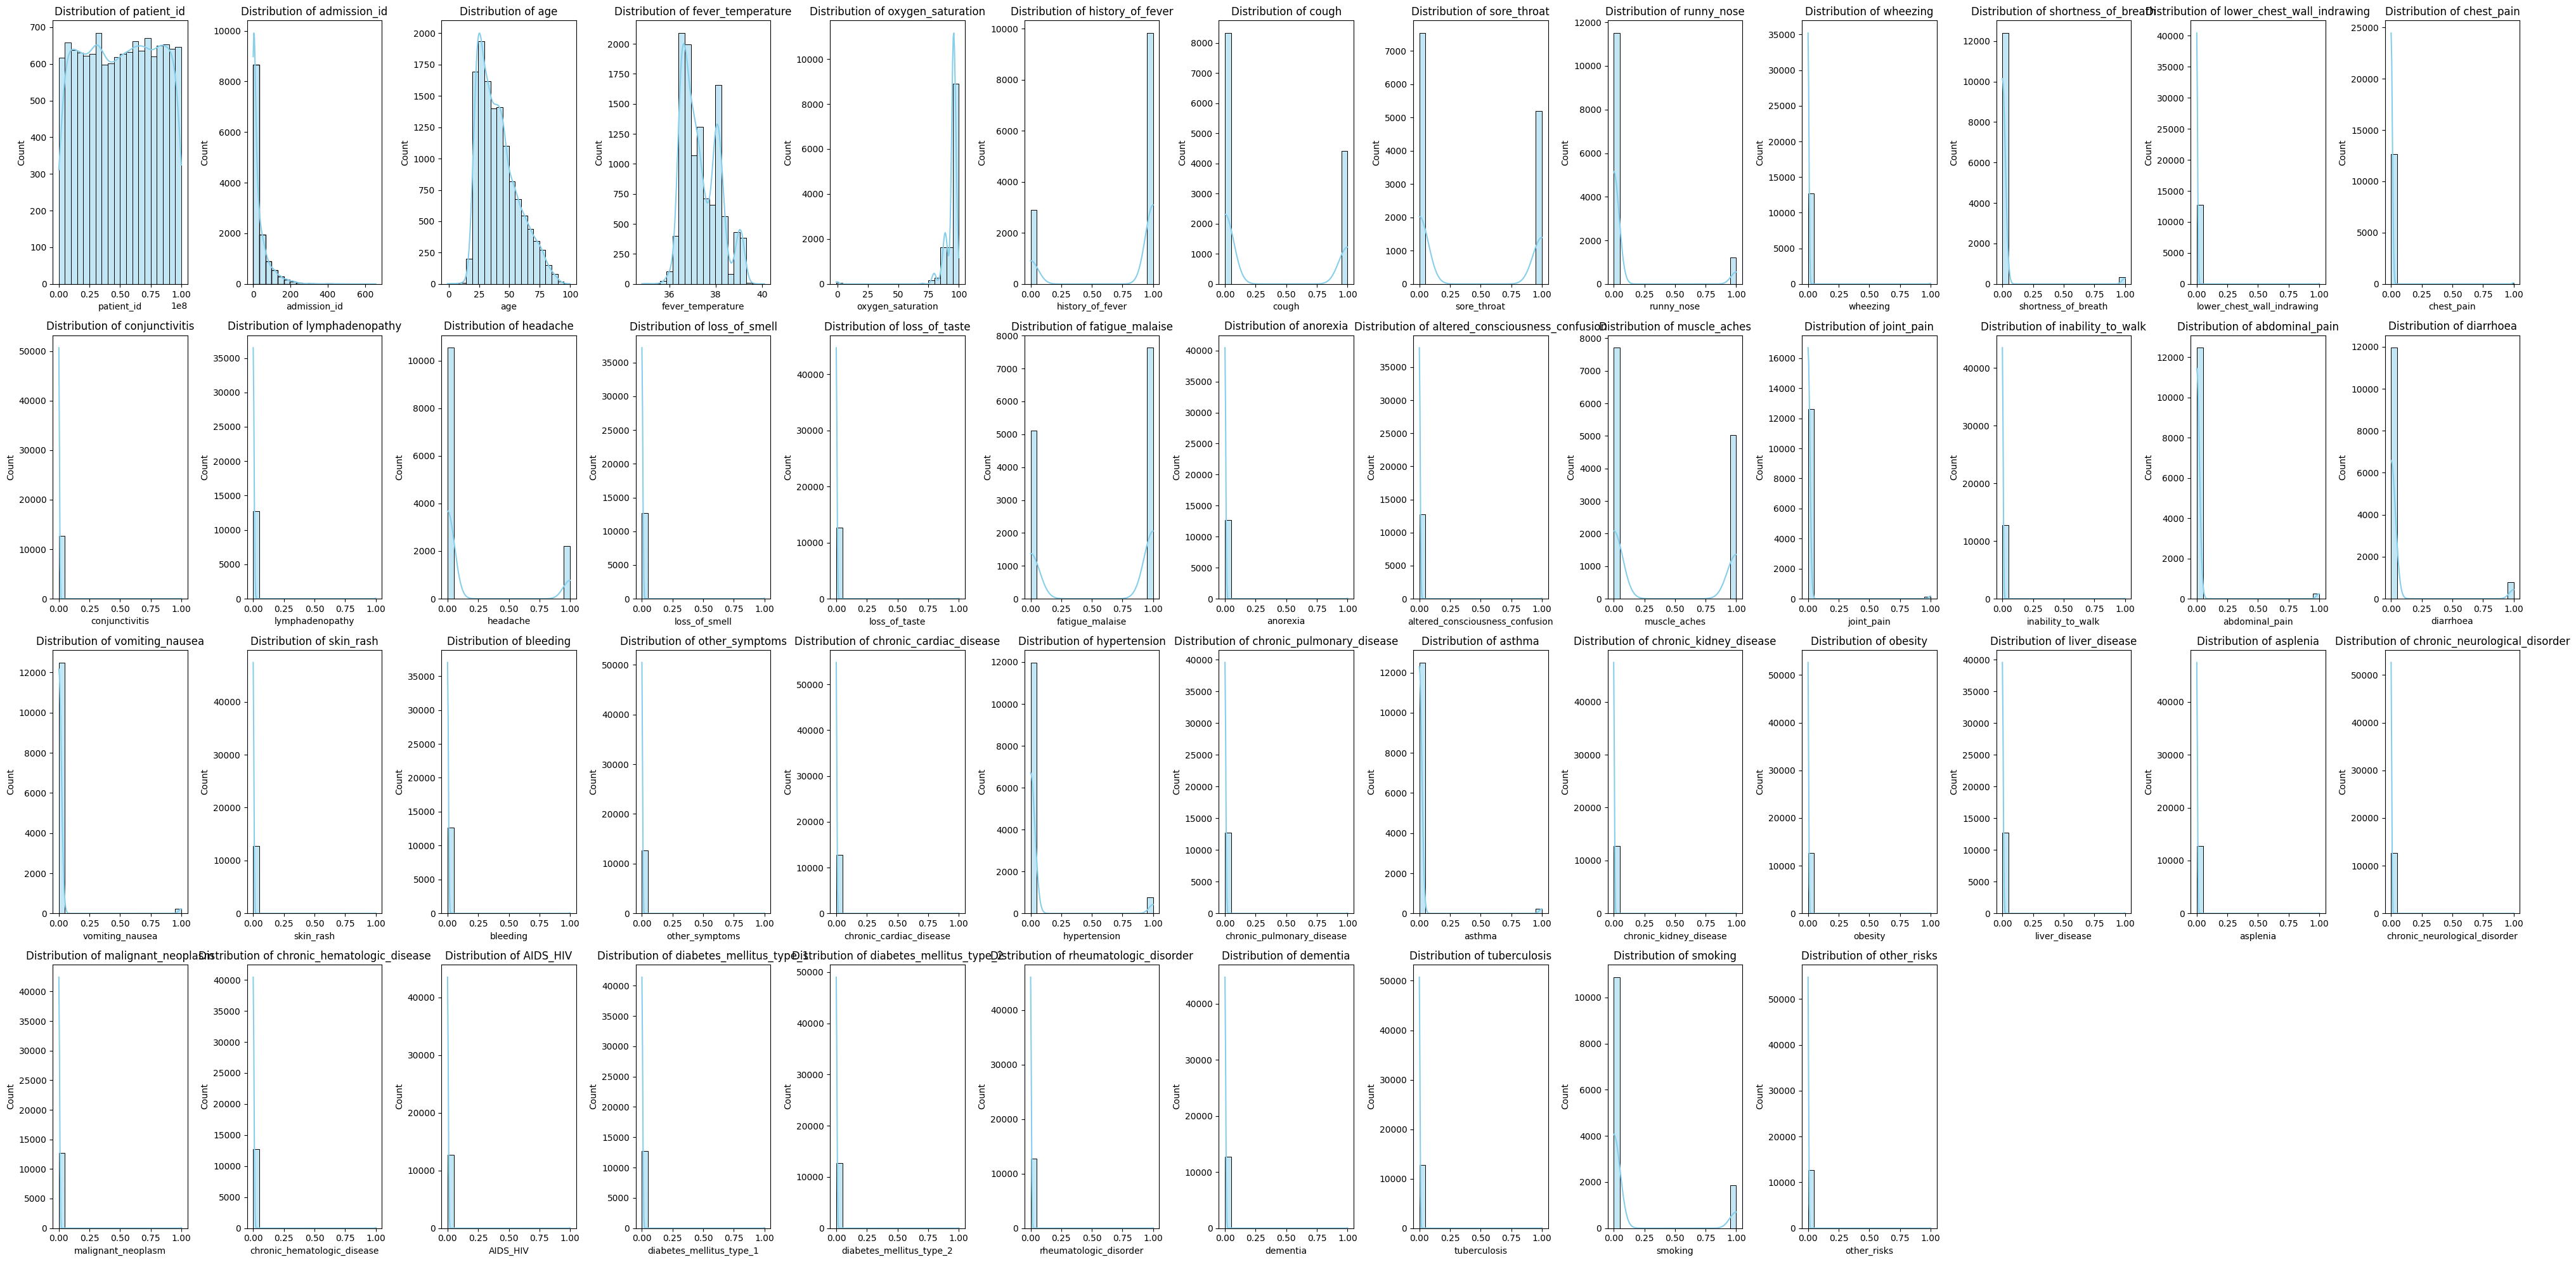

In [80]:
# Set up the plotting space for multiple plots
num_columns_2 = hospital2.select_dtypes(include='number').columns  # Get numerical columns

# Create plots for numerical columns
plt.figure(figsize=(40, 20))
for i, col in enumerate(num_columns_2):
    plt.subplot(4, len(num_columns_2) // 4 + 1, i + 1)  # Set a grid for subplots
    sns.histplot(hospital2[col], kde=True, bins=20, color='skyblue')  # You can change this to other plots (e.g., boxplot)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  # To avoid overlapping subplots

plt.show()

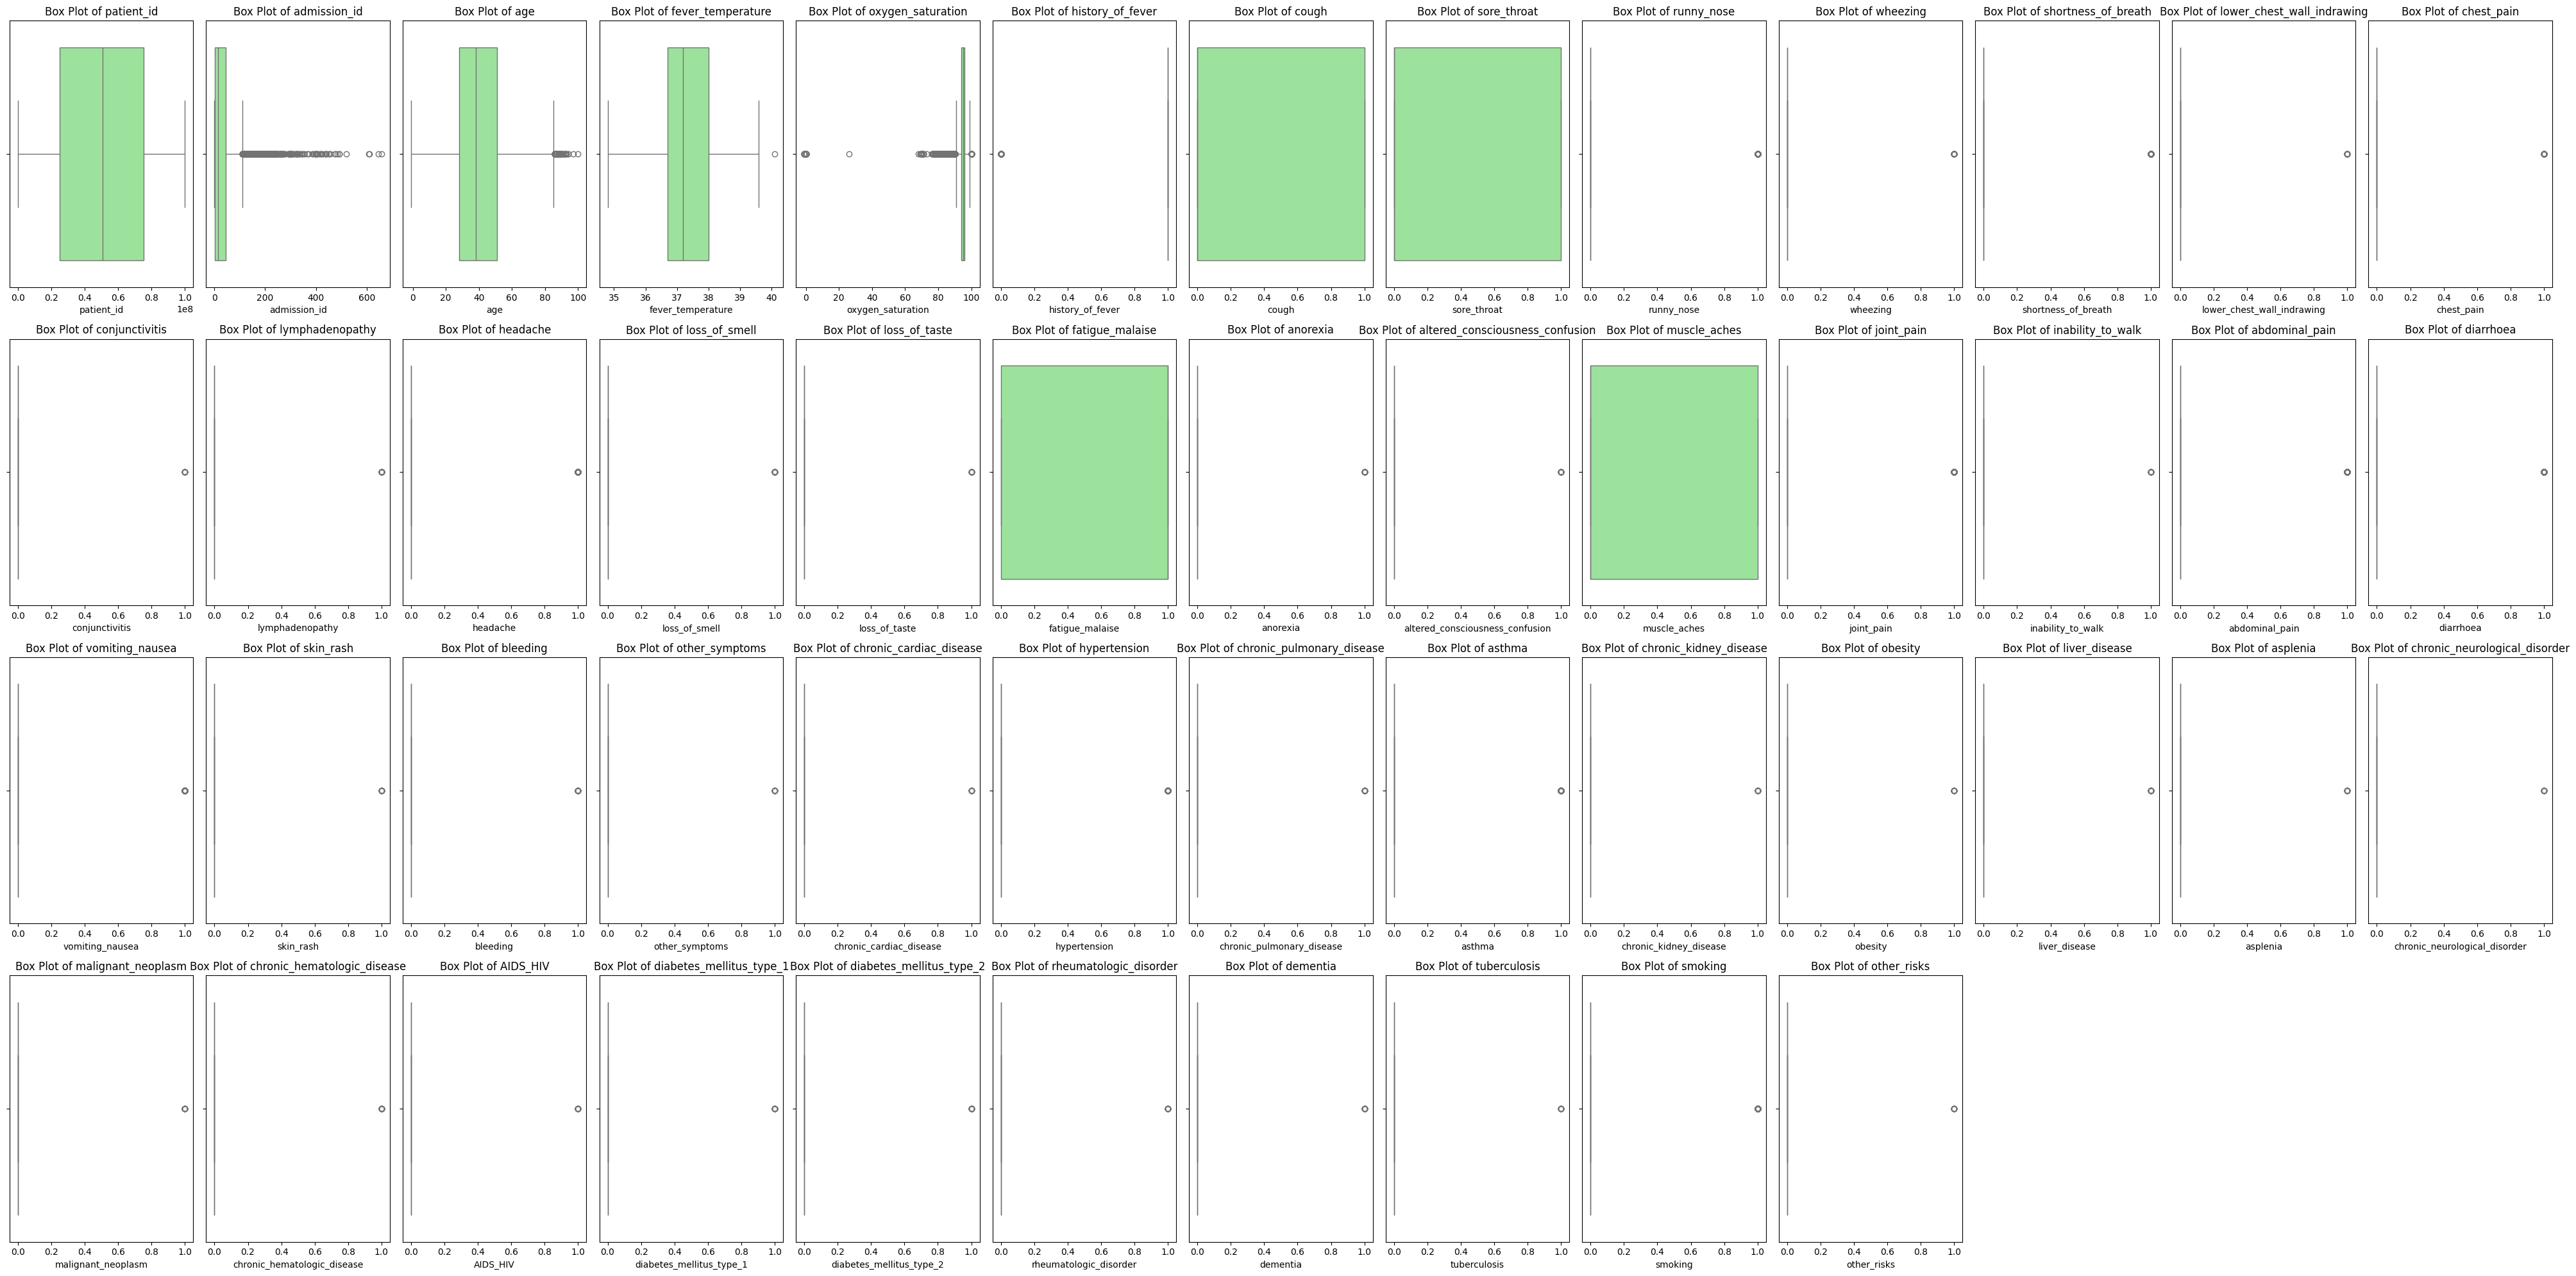

In [81]:
# Set up the plotting space for multiple plots
num_columns_2 = hospital2.select_dtypes(include='number').columns  # Get numerical columns

# Create plots for numerical columns
plt.figure(figsize=(40, 20))
for i, col in enumerate(num_columns_2):
    plt.subplot(4, len(num_columns_2) // 4 + 1, i + 1)  # Set a grid for subplots
    sns.boxplot(x=hospital2[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()  # To avoid overlapping subplots

plt.show()

### Descriptive analysis

Columns with mising values:

fever_temperature                
oxygen_saturation                
chronic_kidney_disease           
obesity                          
liver_disease                    
asplenia                         
chronic_neurological_disorder    
chronic_hematologic_disease      
AIDS_HIV                         
diabetes_mellitus_type_1         
diabetes_mellitus_type_2         
rheumatologic_disorder           
dementia                         
PCR_result                       

In [82]:
mean_fever_temperature = hospital1['fever_temperature'].mean()
print("Mean of the column fever_temperature: ", mean_fever_temperature)

median_fever_temperature = hospital1['fever_temperature'].median()
print("Median of the column fever_temperature: ", median_fever_temperature)

min_fever_temperature = hospital1['fever_temperature'].min()
print("Min of the column fever_temperature: ", min_fever_temperature)

max_fever_temperature = hospital1['fever_temperature'].max()
print("Max of the column fever_temperature: ", max_fever_temperature)


Mean of the column fever_temperature:  37.34355518112889
Median of the column fever_temperature:  37.2
Min of the column fever_temperature:  35.0
Max of the column fever_temperature:  39.8


In [83]:
mean_oxygen_saturation = hospital1['oxygen_saturation'].mean()
print("Mean of the column oxygen_saturation: ", mean_oxygen_saturation)

median_oxygen_saturation = hospital1['oxygen_saturation'].median()
print("Median of the column oxygen_saturation: ", median_oxygen_saturation)

min_oxygen_saturation = hospital1['oxygen_saturation'].min()
print("Min of the column oxygen_saturation: ", min_oxygen_saturation)

max_oxygen_saturation = hospital1['oxygen_saturation'].max()
print("Max of the column oxygen_saturation: ", max_oxygen_saturation)


Mean of the column oxygen_saturation:  93.66759586619527
Median of the column oxygen_saturation:  95.0
Min of the column oxygen_saturation:  -1.0
Max of the column oxygen_saturation:  100.0


We can detect **outliers in oxygen_saturation** column.

In [84]:
different_datesss_rows = hospital2[hospital2['date_of_first_symptoms'] != hospital2['admission_date']]

if not different_datesss_rows.empty:
    print("The following rows have different values between 'patient ID' and 'patient ID.1':")
    print(different_datesss_rows)
    print("Total different rows: " + str(len(different_datesss_rows)))
else:
    print("There are no rows with different values between 'patient ID' and 'patient ID.1'.")

The following rows have different values between 'patient ID' and 'patient ID.1':
       patient_id  admission_id country_of_residence  age  sex  \
0             NaN           NaN                  NaN  NaN  NaN   
12735         NaN           NaN                  NaN  NaN  NaN   
12736         NaN           NaN                  NaN  NaN  NaN   

      date_of_first_symptoms admission_date  fever_temperature  \
0                        NaT            NaT                NaN   
12735                    NaT            NaT                NaN   
12736                    NaT            NaT                NaN   

       oxygen_saturation  history_of_fever  ...  chronic_hematologic_disease  \
0                    NaN               NaN  ...                            0   
12735                NaN               NaN  ...                            0   
12736                NaN               NaN  ...                            0   

       AIDS_HIV  diabetes_mellitus_type_1  diabetes_mellitus_type_2

In [85]:
min_date_1 = hospital1['date_of_first_symptoms'].min()
max_date_1 = hospital1['date_of_first_symptoms'].max()

print(f"Hospital 1 Minimum Date: {min_date_1}")
print(f"Hospital 1 Maximum Date: {max_date_1}")

min_date_2 = hospital2['date_of_first_symptoms'].min()
max_date_2 = hospital2['date_of_first_symptoms'].max()

print(f"Hospital 2 Minimum Date: {min_date_2}")
print(f"Hospital 2 Maximum Date: {max_date_2}")

Hospital 1 Minimum Date: 2021-05-01 00:00:00
Hospital 1 Maximum Date: 2022-03-14 00:00:00
Hospital 2 Minimum Date: 2021-03-01 00:00:00
Hospital 2 Maximum Date: 2022-03-13 17:23:00


In [86]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


# Function to detect and print outlier values
def detect_outliers_with_values(df):
    outliers = {}
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Check if the column is binary (only two unique values)
            if df[col].nunique() == 2:
                continue  # Skip binary columns for numeric outlier detection
            # Numeric columns: IQR method
            Q1 = df[col].quantile(0.15)
            Q3 = df[col].quantile(0.85)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
            if outliers_values:
                outliers[col] = outliers_values
        
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # Datetime columns: Convert to numeric and apply IQR
            timestamp = df[col].astype('int64') // 10**9
            Q1 = timestamp.quantile(0.25)
            Q3 = timestamp.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_values = df[(timestamp < lower_bound) | (timestamp > upper_bound)][col].tolist()
            if outliers_values:
                outliers[col] = outliers_values
        
        elif isinstance(df[col].dtype, pd.CategoricalDtype) or pd.api.types.is_object_dtype(df[col]):
            # Categorical columns: Rare categories
            freq = df[col].value_counts()
            rare_categories = freq[freq < 2].index
            outliers_values = df[df[col].isin(rare_categories)][col].tolist()
            if outliers_values:
                outliers[col] = outliers_values
    
    return outliers

# Detect outliers and print values
outliers1 = detect_outliers_with_values(hospital1)
print("Hospital 1 Outliers detected:")
for col, values in outliers1.items():
    print(f"{col}: {values}")

print("************************************************************************************************************")

outliers2 = detect_outliers_with_values(hospital2)
print("Hospital 2 Outliers detected:")
for col, values in outliers2.items():
    print(f"{col}: {values}")


Hospital 1 Outliers detected:
nationality: ['Guinea', 'Cameroon', 'Rwanda', 'El Salvador', 'Japan', 'Yemen', 'Botswana', 'Zambia', 'Bahrain', 'Singapore']
oxygen_saturation: [0.0, 0.0, 0.0, 69.0, 76.0, 69.0, 0.0, 70.0, 69.0, 0.0, -1.0, -1.0, 0.0, 0.0, 71.0, 0.0, 0.0, 0.0, 0.0, 69.0, 71.0, 0.0, 70.0, 0.0, -1.0, 71.0, 0.0, 0.0, -1.0, 0.0, 70.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 69.0, 0.0, 0.0, -1.0, 0.0, 69.0, 0.0, 0.0, 0.0, 0.0, 70.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 70.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 70.0, 70.0, 0.0, 69.0, 71.0, 0.0, -1.0, 0.0, -1.0, 0.0, 69.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 70.0, -1.0, 0.0, -1.0, -1.0, 70.0, 76.0, 70.0, 0.0, 70.0, 76.0, 70.0, 0.0]
************************************************************************************************************
Hospital 2 Outliers detected:
admission_id: [181.0, 406.0, 205.0, 201.0, 197.0, 184.0, 237.0, 223.0, 186.0, 607.0, 244.0, 295.0, 210.0, 210.0, 208.0

In [92]:
def get_non_binary_numerical_columns(df):
    non_binary_columns = []
    
    for col in df.columns:
        if 'id' in col.lower():
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() > 2:
                non_binary_columns.append(col)
    
    print("Numerical columns (not binary and not ids):", non_binary_columns)

    for col in non_binary_columns:
        mean = df[col].mean()
        median = df[col].median()
        min = df[col].min()
        max = df[col].max()
        print("  - Column '" + str(col) + "': Mean: " + str(mean) + " ; Median: " + str(median)+ " ; Min: " + str(min)   + " ; Max: " + str(max))
    
    return non_binary_columns

non_binary_cols_1 = get_non_binary_numerical_columns(hospital1)
non_binary_cols_2 = get_non_binary_numerical_columns(hospital2)

Numerical columns (not binary and not ids): ['age', 'fever_temperature', 'oxygen_saturation']
  - Column 'age': Mean: 44.969412724306686 ; Median: 43.0 ; Min: -1 ; Max: 100
  - Column 'fever_temperature': Mean: 37.34355518112889 ; Median: 37.2 ; Min: 35.0 ; Max: 39.8
  - Column 'oxygen_saturation': Mean: 93.66759586619527 ; Median: 95.0 ; Min: -1.0 ; Max: 100.0
Numerical columns (not binary and not ids): ['age', 'fever_temperature', 'oxygen_saturation']
  - Column 'age': Mean: 40.784199780116225 ; Median: 38.0 ; Min: -1.0 ; Max: 100.0
  - Column 'fever_temperature': Mean: 37.341684759009986 ; Median: 37.2 ; Min: 34.8 ; Max: 40.1
  - Column 'oxygen_saturation': Mean: 93.57690494893951 ; Median: 95.0 ; Min: -1.0 ; Max: 100.0


In [93]:
# Concatenate 'patient_id' and 'admison_id' in Hospital 2
concatenated_id = hospital2['patient_id'].astype(str) + hospital2['admission_id'].astype(str)

# Compare the `patient_id` in Hospital 1 with the concatenated values in Hospital 2
exists_in_hospital2 = hospital1['patient ID'].isin(concatenated_id)

if exists_in_hospital2.any():
    print("There are True values in 'exists_in_hospital2'.")
else:
    print("No True values found in 'exists_in_hospital2'.")


No True values found in 'exists_in_hospital2'.


In [94]:
different_date_rows_2 = hospital2[hospital2['date_of_first_symptoms'] != hospital2['admission_date']]

if not different_date_rows_2.empty:
    print("The following rows have different values between 'date_of_first_symptoms' and 'admission_date':")
    print(different_date_rows_2)
    print("Total different date rows: " + str(len(different_date_rows_2)))
else:
    print("There are no rows with different values between 'date_of_first_symptoms' and 'admission_date'.")

The following rows have different values between 'date_of_first_symptoms' and 'admission_date':
       patient_id  admission_id country_of_residence  age  sex  \
0             NaN           NaN                  NaN  NaN  NaN   
12735         NaN           NaN                  NaN  NaN  NaN   
12736         NaN           NaN                  NaN  NaN  NaN   

      date_of_first_symptoms admission_date  fever_temperature  \
0                        NaT            NaT                NaN   
12735                    NaT            NaT                NaN   
12736                    NaT            NaT                NaN   

       oxygen_saturation  history_of_fever  ...  chronic_hematologic_disease  \
0                    NaN               NaN  ...                            0   
12735                NaN               NaN  ...                            0   
12736                NaN               NaN  ...                            0   

       AIDS_HIV  diabetes_mellitus_type_1  diabetes_m

### CORRELATION

nationality and pcr_result

In [95]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'nationality' and 'PCR_result' columns
hospital1['nationality_encoded'] = le.fit_transform(hospital1['nationality'])
hospital1['PCR_result_encoded'] = le.fit_transform(hospital1['PCR_result'])

# Calculate the correlation between the two columns
correlation = hospital1['nationality_encoded'].corr(hospital1['PCR_result_encoded'])

# Print the correlation value
print(f"Correlation between Nationality and PCR Result: {correlation}")

Correlation between Nationality and PCR Result: 0.30793156571722075


country of residence and pcr_result

In [96]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'nationality' and 'PCR_result' columns
hospital2['country_of_residence_encoded'] = le.fit_transform(hospital2['country_of_residence'])
hospital2['PCR_result_encoded'] = le.fit_transform(hospital2['PCR_result'])

# Calculate the correlation between the two columns
correlation_2 = hospital2['country_of_residence_encoded'].corr(hospital2['PCR_result_encoded'])

# Print the correlation value
print(f"Correlation between Country of Residence and PCR Result: {correlation_2}")

Correlation between Country of Residence and PCR Result: -0.00656191385371014


all columns hospital 1

In [97]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numeric using Label Encoding
#num_columns = hospital1.select_dtypes(include='number').columns  # Get numerical columns
categorical_columns = hospital1.select_dtypes(include='object').columns   # Get categorical columns

for col in categorical_columns:
    hospital1[col] = le.fit_transform(hospital1[col])

# Now calculate the correlation matrix between all columns
correlation_matrix = hospital1.corr()

# Get the correlation of all columns with 'PCR_result'
correlation_with_pcr = correlation_matrix['PCR_result']

# Print the correlation values with PCR_result
print(correlation_with_pcr)

patient ID                        -0.011133
patient ID.1                      -0.010541
nationality                        0.307932
age                                0.029441
gender K=female E=male            -0.011014
date_of_first_symptoms             0.032017
BASVURUTARIHI                      0.032017
fever_temperature                  0.000612
oxygen_saturation                  0.006648
history_of_fever                   0.018769
cough                              0.014784
sore_throat                        0.011023
runny_nose                         0.006384
wheezing                           0.012281
shortness_of_breath                0.016469
lower_chest_wall_indrawing         0.009161
chest_pain                         0.020587
conjunctivitis                    -0.000447
lymphadenopathy                   -0.007378
headache                           0.004698
loss_of_smell                     -0.008237
loss_of_taste                     -0.019700
fatigue_malaise                 

all columns hospital 2

In [98]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numeric using Label Encoding
#num_columns = hospital1.select_dtypes(include='number').columns  # Get numerical columns
categorical_columns_2 = hospital2.select_dtypes(include='object').columns   # Get categorical columns

for col in categorical_columns_2:
    hospital2[col] = le.fit_transform(hospital2[col])

# Now calculate the correlation matrix between all columns
correlation_matrix_2 = hospital2.corr()

# Get the correlation of all columns with 'PCR_result'
correlation_with_pcr_2 = correlation_matrix_2['PCR_result']

# Print the correlation values with PCR_result
print(correlation_with_pcr_2)

patient_id                        -0.000589
admission_id                      -0.059763
country_of_residence              -0.006562
age                                0.019769
sex                               -0.010733
date_of_first_symptoms            -0.036249
admission_date                    -0.036249
fever_temperature                 -0.002661
oxygen_saturation                 -0.038465
history_of_fever                  -0.044311
cough                             -0.078160
sore_throat                       -0.015458
runny_nose                        -0.061728
wheezing                          -0.024856
shortness_of_breath                0.026827
lower_chest_wall_indrawing        -0.004464
chest_pain                        -0.033378
conjunctivitis                     0.017724
lymphadenopathy                    0.000530
headache                          -0.014010
loss_of_smell                     -0.008578
loss_of_taste                     -0.019238
fatigue_malaise                 